# Install packages

In [3]:
import tensorflow as tf

In [10]:
from sklearn.cluster import KMeans

In [12]:
import pandas as pd

In [13]:
import numpy as np

In [14]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane"

C:\Users\jchen148\THE Rankings\Report to Jane


# Plot distribution of USA universities CitationCounts

In [5]:
citation = pd.read_csv('Updated_THE_Ranked_Universites_CitationCounts_2014_2018.csv')

citation.head()

,Country,CountryCode,Uid,UniversityName,metric,Citation2014,Citation2015,Citation2016,Citation2017,Citation2018
0,United States,USA,508076,Harvard University,CitationCount,837994.0,686576.0,529054.0,363995.0,172830.0
1,United States,USA,508219,Stanford University,CitationCount,404346.0,363567.0,282005.0,194136.0,95069.0
2,Canada,CAN,501048,University of Toronto,CitationCount,360177.0,344355.0,254462.0,172125.0,86219.0
3,United States,USA,508094,Johns Hopkins University,CitationCount,324631.0,289131.0,218379.0,147459.0,77682.0
4,United Kingdom,GBR,315091,University of Oxford,CitationCount,355751.0,313129.0,238271.0,149907.0,75747.0


In [6]:
totalcitation=citation['Citation2014']+citation['Citation2015']+citation['Citation2016']+citation['Citation2017']+citation['Citation2018']

In [7]:
citation['Total']=totalcitation

In [9]:
citation.head()

citation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 11 columns):
Country           1002 non-null object
CountryCode       1002 non-null object
Uid               1002 non-null int64
UniversityName    1002 non-null object
metric            1002 non-null object
Citation2014      998 non-null float64
Citation2015      995 non-null float64
Citation2016      998 non-null float64
Citation2017      1000 non-null float64
Citation2018      1001 non-null float64
Total             993 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.2+ KB


In [40]:
changedtype=lambda x: int(x)

In [31]:
#citation.fillna(0)

for i in range(0,len(citation)):
    if citation.loc[i]['Citation2014'] is np.nan:
        print("yes")

In [38]:
citation['Citation2014'].isnull()

citation=citation.fillna(0)

# change all citationcount to int64

In [48]:
citation['Citation2018']=citation['Citation2018'].apply(changedtype)

In [47]:
citation['Citation2017']=citation['Citation2017'].apply(changedtype)

In [46]:
citation['Citation2016']=citation['Citation2016'].apply(changedtype)

In [45]:
citation['Citation2015']=citation['Citation2015'].apply(changedtype)

In [43]:
citation['Citation2014']=citation['Citation2014'].apply(changedtype)

In [49]:
citation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 11 columns):
Country           1002 non-null object
CountryCode       1002 non-null object
Uid               1002 non-null int64
UniversityName    1002 non-null object
metric            1002 non-null object
Citation2014      1002 non-null int64
Citation2015      1002 non-null int64
Citation2016      1002 non-null int64
Citation2017      1002 non-null int64
Citation2018      1002 non-null int64
Total             1002 non-null float64
dtypes: float64(1), int64(6), object(4)
memory usage: 86.2+ KB


In [50]:
citation.head()

,Country,CountryCode,Uid,UniversityName,metric,Citation2014,Citation2015,Citation2016,Citation2017,Citation2018,Total
0,United States,USA,508076,Harvard University,CitationCount,837994,686576,529054,363995,172830,2590449.0
1,United States,USA,508219,Stanford University,CitationCount,404346,363567,282005,194136,95069,1339123.0
2,Canada,CAN,501048,University of Toronto,CitationCount,360177,344355,254462,172125,86219,1217338.0
3,United States,USA,508094,Johns Hopkins University,CitationCount,324631,289131,218379,147459,77682,1057282.0
4,United Kingdom,GBR,315091,University of Oxford,CitationCount,355751,313129,238271,149907,75747,1132805.0


In [66]:
new=citation.sort_values(['CountryCode','Total'], ascending=False)
new.head()

,Country,CountryCode,Uid,UniversityName,metric,Citation2014,Citation2015,Citation2016,Citation2017,Citation2018,Total
334,South Africa,ZAF,115007,University of Pretoria,CitationCount,20169,20294,18564,12800,5918,77745.0
307,South Africa,ZAF,115005,University of Johannesburg,CitationCount,13732,17059,16450,12228,6622,66091.0
369,South Africa,ZAF,115001,North West University,CitationCount,9833,8025,14378,13220,5225,50681.0
575,South Africa,ZAF,115010,University of the Western Cape,CitationCount,9538,8008,7081,5315,2365,32307.0
586,South Africa,ZAF,115003,Tshwane University of Technology,CitationCount,3215,2665,2844,3173,2271,14168.0


# Filtered the universities in USA

In [70]:
USdata=new[new['CountryCode']=='USA']

In [71]:
USdata.head()

,Country,CountryCode,Uid,UniversityName,metric,Citation2014,Citation2015,Citation2016,Citation2017,Citation2018,Total
0,United States,USA,508076,Harvard University,CitationCount,837994,686576,529054,363995,172830,2590449.0
1,United States,USA,508219,Stanford University,CitationCount,404346,363567,282005,194136,95069,1339123.0
3,United States,USA,508094,Johns Hopkins University,CitationCount,324631,289131,218379,147459,77682,1057282.0
6,United States,USA,508358,University of Washington,CitationCount,314702,269985,218378,150820,70792,1024677.0
11,United States,USA,508111,Massachusetts Institute of Technology,CitationCount,285399,241655,186864,121031,57319,892268.0


# Use seaborn

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [73]:
sns.set(color_codes=True)

In [75]:
USpartial=USdata.loc[:][['UniversityName','Total']]

In [80]:
USpartial.head()

USpartial2=USpartial.reset_index()

USpartial2=USpartial2.iloc[:,1:]

USpartial2.head()

,UniversityName,Total
0,Harvard University,2590449.0
1,Stanford University,1339123.0
2,Johns Hopkins University,1057282.0
3,University of Washington,1024677.0
4,Massachusetts Institute of Technology,892268.0


In [93]:
target=USpartial2[USpartial2['UniversityName']=='University of Rochester']

target.head()

,UniversityName,Total
28,University of Rochester,254555.0


# Change datatype to int64

In [95]:

target.loc[:]['Total']=target['Total'].astype(int)



In [96]:
target.head()


,UniversityName,Total
28,University of Rochester,254555


In [104]:
USpartial2.head()

USpartial2.set_index('UniversityName')

USpartial2.loc[:]['Total']=USpartial2['Total'].astype(int)



In [113]:
USpartial2=USpartial2.set_index('UniversityName')

In [114]:
USpartial2.head()

,Total
UniversityName,
Harvard University,2590449.0
Stanford University,1339123.0
Johns Hopkins University,1057282.0
University of Washington,1024677.0
Massachusetts Institute of Technology,892268.0


In [107]:
target.head()

target.set_index('UniversityName')



,Total
UniversityName,
University of Rochester,254555


In [109]:
target=target.set_index('UniversityName')


In [110]:
target.head()

,Total
UniversityName,
University of Rochester,254555


In [120]:
len(USpartial2)

153

# The distribution of total citationcounts for USA universities

# In total 153 universities, including U of R

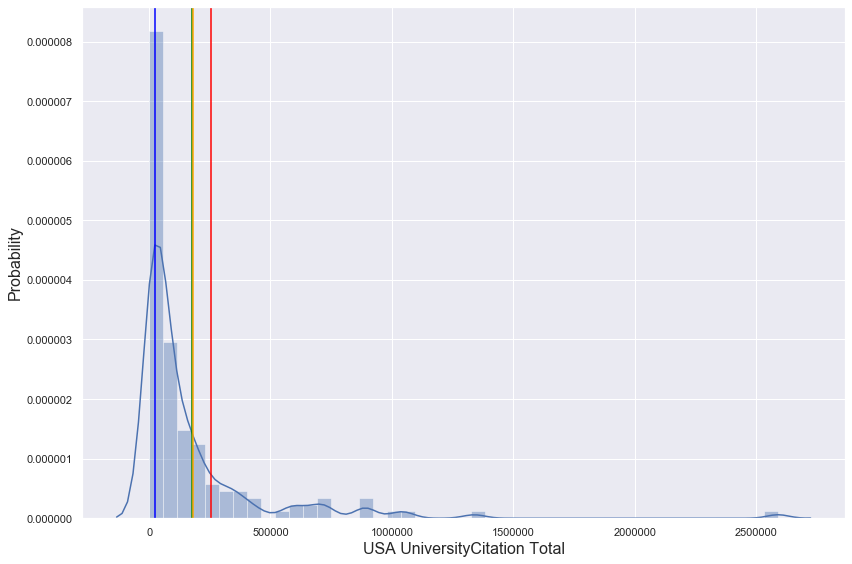

In [156]:
import pandas as pd
fig, ax = plt.subplots(figsize=(12,8))
x = pd.Series(USpartial2['Total'], name="CitationCount Total")
ax = sns.distplot(x)

ax.set_xlabel("USA UniversityCitation Total",fontsize=16)
ax.set_ylabel("Probability",fontsize=16)
plt.axvline(254555, color='red') # this is where U of R
plt.axvline(np.mean(USpartial2['Total']), color='green') # this is the mean, 175882.56
plt.axvline(np.percentile(USpartial2['Total'], 25.0), color='blue') # Q1
plt.axvline(np.percentile(USpartial2['Total'], 75.0), color='orange') # Q3 very close to the mean
#plt.legend()
plt.tight_layout()

In [147]:
import matplotlib
from matplotlib import mlab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [152]:
np.percentile(USpartial2['Total'], np.array([25.0,75.0]))

array([ 24316., 180027.])

In [122]:
target

,Total
UniversityName,
University of Rochester,254555


In [136]:
np.round(np.mean(USpartial2['Total']), 2)

175882.56

# The following is data-cleaning process

# read in school list

In [ ]:
school_list = open(r"C:\Users\jchen148\THE Rankings\Report to Jane\THE_School_List_OK.txt")

school_name=school_list.read()

In [ ]:
import pandas as pd
t = school_name

data=[]

for i in t.split("\n"):
    if i[:1].isdigit():
        data.append(" ".join(i.split(" ")[:20]))
        print(" ".join(i.split(" ")[:20]))
        
data_want = pd.DataFrame(data, columns=['Scool Name'])


data_want.to_csv("all_university_name.csv", index=False)  # all the university name

In [ ]:
# cleaned all the ranks and leadning and trailing whitespace

t = school_name

uni_name = []

for i in t.split("\n"):
    if i[:1].isdigit():
        uni_name.append(" ".join(i.split(" ")[-5:]))
        print(" ".join(i.split(" ")[-5:]))
        uni_name.append(" ".join(i.split(" ")[-5:]))

In [ ]:
# remove trailing whitespace

import re
import string

cleaned=[]

for line in uni_name:
    line=str(line)
#    print(line.strip(' \t\n\r'))
#    print(line.rstrip(string.digits))
#    print(re.sub('^\d+[\W_]+', '', line))
    want_data = re.sub('^\d+[\W_]+', '', line)
    print(want_data.strip())
    cleaned.append(want_data.strip())

In [ ]:
# remove existing numbers

import string
import re

want_3=[]

for name in cleaned:
    print(name)
    print(re.sub('^\d+[\W_]+','',name))
    want_3.append(re.sub('^\d+[\W_]+','',name))

In [11]:
want_3.append('University of Rochester')

In [15]:
DF={}

DF=pd.DataFrame({'UniName':want_3})

In [17]:
DF=DF.drop_duplicates()

In [19]:
DF=DF.reset_index()

In [21]:
DF=DF.iloc[:,1]

In [25]:
DF=pd.DataFrame(DF)

In [26]:
DF.to_csv("UniNameList_OK.csv", index=False)

# Use APIs

In [ ]:
for line in want_3:
    url= "https://api.elsevier.com/metrics/institution/search?query=name("+line+")"

# combine all the Uids retrieved from APIs

In [34]:
filename='THE_CountryCode_Result_1202_{}'

for i in range(1,14):
    print(filename.format(i))

THE_CountryCode_Result_1202_1
THE_CountryCode_Result_1202_2
THE_CountryCode_Result_1202_3
THE_CountryCode_Result_1202_4
THE_CountryCode_Result_1202_5
THE_CountryCode_Result_1202_6
THE_CountryCode_Result_1202_7
THE_CountryCode_Result_1202_8
THE_CountryCode_Result_1202_9
THE_CountryCode_Result_1202_10
THE_CountryCode_Result_1202_11
THE_CountryCode_Result_1202_12
THE_CountryCode_Result_1202_13


In [36]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane"

C:\Users\jchen148\THE Rankings\Report to Jane


In [61]:
filename='THE_CountryCode_Result_1202_{}.csv'

chucks=[]

for i in range(1,14):
#    print(filename.format(i))
    chucks.append(pd.read_csv(filename.format(i)))

data=pd.concat(chucks, ignore_index=True)
    
data.head()


,Unnamed: 0,University Name,University id,Country,Country Code
0,0,University of Oxford,315091,United Kingdom,GBR
1,1,"Jet Propulsion Laboratory, California Institut...",508092,United States,USA
2,2,California Institute of Technology,508021,United States,USA
3,3,University of Cambridge,315068,United Kingdom,GBR
4,4,Stanford University,508219,United States,USA


In [62]:
del data['Unnamed: 0']

# Use SciVal institution metrics API

In [42]:
# https://api.elsevier.com/analytics/scival/institution/metrics

In [63]:
data.head()


,University Name,University id,Country,Country Code
0,University of Oxford,315091,United Kingdom,GBR
1,"Jet Propulsion Laboratory, California Institut...",508092,United States,USA
2,California Institute of Technology,508021,United States,USA
3,University of Cambridge,315068,United Kingdom,GBR
4,Stanford University,508219,United States,USA


In [64]:
for line in data['University id'][:2]:
    print(line)

315091
508092


In [85]:
for line in data['University id'][:2]:
    print(line)

315091
508092


# ScholarlyOutput

In [97]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data


In [145]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

inst_country=[]
inst_cc=[]
inst_id=[]
inst_link=[]
inst_name=[]
metricType=[]
value2014=[]
value2015=[]
value2016=[]
value2017=[]
value2018=[]


for line in data['University id'][1000:]:
    url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'
 #   print(url.format(line))
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
    if result['results'] is not None:
        if len(result['results'])>=1:
            if 'institution' in result['results'][0]:
#                if 'country' in result['results'][0]['institution']:
                inst_country.append(result['results'][0]['institution']['country'])
#            if 'countryCode' in result['results'][0]['institution']:
                inst_cc.append(result['results'][0]['institution']['countryCode'])
#            if 'id' in result['results'][0]['institution']:
                inst_id.append(result['results'][0]['institution']['id'])
#            if 'link' in result['results'][0]['institution']:
                inst_link.append(result['results'][0]['institution']['link'])
#            if 'name' in result['results'][0]['institution']:
                inst_name.append(result['results'][0]['institution']['name'])
            if 'metrics' in result['results'][0]:
#            if len(result['results'][0]['metrics'])>=1:
                if 'metricType' in result['results'][0]['metrics'][0]:
                    metricType.append(result['results'][0]['metrics'][0]['metricType'])
                if 'valueByYear' in result['results'][0]['metrics'][0]:
                    if '2014' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2014.append(result['results'][0]['metrics'][0]['valueByYear']['2014'])
                    if '2015' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2015.append(result['results'][0]['metrics'][0]['valueByYear']['2015'])
                    if '2016' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2016.append(result['results'][0]['metrics'][0]['valueByYear']['2016'])
                    if '2017' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2017.append(result['results'][0]['metrics'][0]['valueByYear']['2017'])
                    if '2018' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2018.append(result['results'][0]['metrics'][0]['valueByYear']['2018'])

s1=pd.Series(inst_country, name='country')
s2=pd.Series(inst_cc, name='countryCode')
s3=pd.Series(inst_id, name='institution_id')
s4=pd.Series(inst_link, name='link')
s5=pd.Series(inst_name, name='institution_name')
s6=pd.Series(metricType, name='metricType')
s7=pd.Series(value2014, name='2014')
s8=pd.Series(value2015, name='2015')
s9=pd.Series(value2016, name='2016')
s10=pd.Series(value2017, name='2017')
s11=pd.Series(value2018, name='2018')


DF=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11], axis=1)
DF.to_csv("THE_UNI_CitationCount_ALL_11.csv", index=False)

# CitationCount, CitedPublications, FWCI, and PublicationinTopJournal Percentile

In [122]:
# FWCI

In [133]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

inst_country=[]
inst_cc=[]
inst_id=[]
inst_link=[]
inst_name=[]
metricType=[]
value2014=[]
value2015=[]
value2016=[]
value2017=[]
value2018=[]
percentage2014=[]
percentage2015=[]
percentage2016=[]
percentage2017=[]
percentage2018=[]


for line in data['University id'][1000:]:
    url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=FieldWeightedCitationImpact&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'
 #   print(url.format(line))
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
    if result['results'] is not None:
        if len(result['results'])>=1:
            if 'institution' in result['results'][0]:
#                if 'country' in result['results'][0]['institution']:
                inst_country.append(result['results'][0]['institution']['country'])
#            if 'countryCode' in result['results'][0]['institution']:
                inst_cc.append(result['results'][0]['institution']['countryCode'])
#            if 'id' in result['results'][0]['institution']:
                inst_id.append(result['results'][0]['institution']['id'])
#            if 'link' in result['results'][0]['institution']:
                inst_link.append(result['results'][0]['institution']['link'])
#            if 'name' in result['results'][0]['institution']:
                inst_name.append(result['results'][0]['institution']['name'])
            if 'metrics' in result['results'][0]:
#            if len(result['results'][0]['metrics'])>=1:
                if 'metricType' in result['results'][0]['metrics'][0]:
                    metricType.append(result['results'][0]['metrics'][0]['metricType'])
                if 'valueByYear' in result['results'][0]['metrics'][0]:
                    if '2014' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2014.append(result['results'][0]['metrics'][0]['valueByYear']['2014'])
                    if '2015' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2015.append(result['results'][0]['metrics'][0]['valueByYear']['2015'])
                    if '2016' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2016.append(result['results'][0]['metrics'][0]['valueByYear']['2016'])
                    if '2017' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2017.append(result['results'][0]['metrics'][0]['valueByYear']['2017'])
                    if '2018' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2018.append(result['results'][0]['metrics'][0]['valueByYear']['2018'])
                if 'percentageByYear' in result['results'][0]['metrics'][0]:
                    if '2014' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2014.append(result['results'][0]['metrics'][0]['percentageByYear']['2014'])
                    if '2015' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2015.append(result['results'][0]['metrics'][0]['percentageByYear']['2015'])
                    if '2016' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2016.append(result['results'][0]['metrics'][0]['percentageByYear']['2016'])
                    if '2017' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2017.append(result['results'][0]['metrics'][0]['percentageByYear']['2017'])
                    if '2018' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2018.append(result['results'][0]['metrics'][0]['percentageByYear']['2018'])
                else:
                    percentage2014.append('')
                    percentage2015.append('')
                    percentage2016.append('')
                    percentage2017.append('')
                    percentage2018.append('')
                    

s1=pd.Series(inst_country, name='country')
s2=pd.Series(inst_cc, name='countryCode')
s3=pd.Series(inst_id, name='institution_id')
s4=pd.Series(inst_link, name='link')
s5=pd.Series(inst_name, name='institution_name')
s6=pd.Series(metricType, name='metricType')
s7=pd.Series(value2014, name='2014')
s8=pd.Series(value2015, name='2015')
s9=pd.Series(value2016, name='2016')
s10=pd.Series(value2017, name='2017')
s11=pd.Series(value2018, name='2018')
#s12=pd.Series(percentage2014, name='percent2014')
#s13=pd.Series(percentage2015, name='percent2015')
#s14=pd.Series(percentage2016, name='percent2016')
#s15=pd.Series(percentage2017, name='percent2017')
#s16=pd.Series(percentage2018, name='percent2018')


DF=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11], axis=1)
DF.to_csv("THE_UNI_FWCI_11.csv", index=False)

In [134]:
# CitationCount

In [133]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

inst_country=[]
inst_cc=[]
inst_id=[]
inst_link=[]
inst_name=[]
metricType=[]
value2014=[]
value2015=[]
value2016=[]
value2017=[]
value2018=[]
percentage2014=[]
percentage2015=[]
percentage2016=[]
percentage2017=[]
percentage2018=[]


for line in data['University id'][1000:]:
    url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=FieldWeightedCitationImpact&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'
 #   print(url.format(line))
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
    if result['results'] is not None:
        if len(result['results'])>=1:
            if 'institution' in result['results'][0]:
#                if 'country' in result['results'][0]['institution']:
                inst_country.append(result['results'][0]['institution']['country'])
#            if 'countryCode' in result['results'][0]['institution']:
                inst_cc.append(result['results'][0]['institution']['countryCode'])
#            if 'id' in result['results'][0]['institution']:
                inst_id.append(result['results'][0]['institution']['id'])
#            if 'link' in result['results'][0]['institution']:
                inst_link.append(result['results'][0]['institution']['link'])
#            if 'name' in result['results'][0]['institution']:
                inst_name.append(result['results'][0]['institution']['name'])
            if 'metrics' in result['results'][0]:
#            if len(result['results'][0]['metrics'])>=1:
                if 'metricType' in result['results'][0]['metrics'][0]:
                    metricType.append(result['results'][0]['metrics'][0]['metricType'])
                if 'valueByYear' in result['results'][0]['metrics'][0]:
                    if '2014' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2014.append(result['results'][0]['metrics'][0]['valueByYear']['2014'])
                    if '2015' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2015.append(result['results'][0]['metrics'][0]['valueByYear']['2015'])
                    if '2016' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2016.append(result['results'][0]['metrics'][0]['valueByYear']['2016'])
                    if '2017' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2017.append(result['results'][0]['metrics'][0]['valueByYear']['2017'])
                    if '2018' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2018.append(result['results'][0]['metrics'][0]['valueByYear']['2018'])
                if 'percentageByYear' in result['results'][0]['metrics'][0]:
                    if '2014' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2014.append(result['results'][0]['metrics'][0]['percentageByYear']['2014'])
                    if '2015' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2015.append(result['results'][0]['metrics'][0]['percentageByYear']['2015'])
                    if '2016' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2016.append(result['results'][0]['metrics'][0]['percentageByYear']['2016'])
                    if '2017' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2017.append(result['results'][0]['metrics'][0]['percentageByYear']['2017'])
                    if '2018' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2018.append(result['results'][0]['metrics'][0]['percentageByYear']['2018'])
                else:
                    percentage2014.append('')
                    percentage2015.append('')
                    percentage2016.append('')
                    percentage2017.append('')
                    percentage2018.append('')
                    

s1=pd.Series(inst_country, name='country')
s2=pd.Series(inst_cc, name='countryCode')
s3=pd.Series(inst_id, name='institution_id')
s4=pd.Series(inst_link, name='link')
s5=pd.Series(inst_name, name='institution_name')
s6=pd.Series(metricType, name='metricType')
s7=pd.Series(value2014, name='2014')
s8=pd.Series(value2015, name='2015')
s9=pd.Series(value2016, name='2016')
s10=pd.Series(value2017, name='2017')
s11=pd.Series(value2018, name='2018')
#s12=pd.Series(percentage2014, name='percent2014')
#s13=pd.Series(percentage2015, name='percent2015')
#s14=pd.Series(percentage2016, name='percent2016')
#s15=pd.Series(percentage2017, name='percent2017')
#s16=pd.Series(percentage2018, name='percent2018')


DF=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11], axis=1)
DF.to_csv("THE_UNI_FWCI_11.csv", index=False)

In [146]:
# CitedPublications

In [159]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

inst_country=[]
inst_cc=[]
inst_id=[]
inst_link=[]
inst_name=[]
metricType=[]
value2014=[]
value2015=[]
value2016=[]
value2017=[]
value2018=[]
percentage2014=[]
percentage2015=[]
percentage2016=[]
percentage2017=[]
percentage2018=[]


for line in data['University id'][1000:]:
    url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitedPublications&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'
 #   print(url.format(line))
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "d3794058e2b24417b5dfd0ef8990e2dc"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
    if 'results' in result:
        if len(result['results'])>=1:
            if 'institution' in result['results'][0]:
#                if 'country' in result['results'][0]['institution']:
                inst_country.append(result['results'][0]['institution']['country'])
#            if 'countryCode' in result['results'][0]['institution']:
                inst_cc.append(result['results'][0]['institution']['countryCode'])
#            if 'id' in result['results'][0]['institution']:
                inst_id.append(result['results'][0]['institution']['id'])
#            if 'link' in result['results'][0]['institution']:
                inst_link.append(result['results'][0]['institution']['link'])
#            if 'name' in result['results'][0]['institution']:
                inst_name.append(result['results'][0]['institution']['name'])
            if 'metrics' in result['results'][0]:
#            if len(result['results'][0]['metrics'])>=1:
                if 'metricType' in result['results'][0]['metrics'][0]:
                    metricType.append(result['results'][0]['metrics'][0]['metricType'])
                if 'valueByYear' in result['results'][0]['metrics'][0]:
                    if '2014' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2014.append(result['results'][0]['metrics'][0]['valueByYear']['2014'])
                    if '2015' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2015.append(result['results'][0]['metrics'][0]['valueByYear']['2015'])
                    if '2016' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2016.append(result['results'][0]['metrics'][0]['valueByYear']['2016'])
                    if '2017' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2017.append(result['results'][0]['metrics'][0]['valueByYear']['2017'])
                    if '2018' in result['results'][0]['metrics'][0]['valueByYear']:
                        value2018.append(result['results'][0]['metrics'][0]['valueByYear']['2018'])
                if 'percentageByYear' in result['results'][0]['metrics'][0]:
                    if '2014' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2014.append(result['results'][0]['metrics'][0]['percentageByYear']['2014'])
                    if '2015' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2015.append(result['results'][0]['metrics'][0]['percentageByYear']['2015'])
                    if '2016' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2016.append(result['results'][0]['metrics'][0]['percentageByYear']['2016'])
                    if '2017' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2017.append(result['results'][0]['metrics'][0]['percentageByYear']['2017'])
                    if '2018' in result['results'][0]['metrics'][0]['percentageByYear']:
                        percentage2018.append(result['results'][0]['metrics'][0]['percentageByYear']['2018'])
                else:
                    percentage2014.append('')
                    percentage2015.append('')
                    percentage2016.append('')
                    percentage2017.append('')
                    percentage2018.append('')
                    

s1=pd.Series(inst_country, name='country')
s2=pd.Series(inst_cc, name='countryCode')
s3=pd.Series(inst_id, name='institution_id')
s4=pd.Series(inst_link, name='link')
s5=pd.Series(inst_name, name='institution_name')
s6=pd.Series(metricType, name='metricType')
s7=pd.Series(value2014, name='2014')
s8=pd.Series(value2015, name='2015')
s9=pd.Series(value2016, name='2016')
s10=pd.Series(value2017, name='2017')
s11=pd.Series(value2018, name='2018')
s12=pd.Series(percentage2014, name='percent2014')
s13=pd.Series(percentage2015, name='percent2015')
s14=pd.Series(percentage2016, name='percent2016')
s15=pd.Series(percentage2017, name='percent2017')
s16=pd.Series(percentage2018, name='percent2018')


DF=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16], axis=1)
DF.to_csv("THE_UNI_CitedPublications_11.csv", index=False)

In [160]:
#PublicationsInTopJournalPercentiles

In [186]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

inst_country=[]
inst_cc=[]
inst_id=[]
inst_link=[]
inst_name=[]
metricType=[]
threshold=[]
t1_value2014=[]
t1_value2015=[]
t1_value2016=[]
t1_value2017=[]
t1_value2018=[]
t1_percentage2014=[]
t1_percentage2015=[]
t1_percentage2016=[]
t1_percentage2017=[]
t1_percentage2018=[]
t5_value2014=[]
t5_value2015=[]
t5_value2016=[]
t5_value2017=[]
t5_value2018=[]
t5_percentage2014=[]
t5_percentage2015=[]
t5_percentage2016=[]
t5_percentage2017=[]
t5_percentage2018=[]
t10_value2014=[]
t10_value2015=[]
t10_value2016=[]
t10_value2017=[]
t10_value2018=[]
t10_percentage2014=[]
t10_percentage2015=[]
t10_percentage2016=[]
t10_percentage2017=[]
t10_percentage2018=[]
t25_value2014=[]
t25_value2015=[]
t25_value2016=[]
t25_value2017=[]
t25_value2018=[]
t25_percentage2014=[]
t25_percentage2015=[]
t25_percentage2016=[]
t25_percentage2017=[]
t25_percentage2018=[]



for line in data['University id'][:2]:
    url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=PublicationsInTopJournalPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'
 #   print(url.format(line))
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "d3794058e2b24417b5dfd0ef8990e2dc"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
    if 'results' in result:
        if len(result['results'])>=1:
            if 'institution' in result['results'][0]:
#                if 'country' in result['results'][0]['institution']:
                inst_country.append(result['results'][0]['institution']['country'])
#            if 'countryCode' in result['results'][0]['institution']:
                inst_cc.append(result['results'][0]['institution']['countryCode'])
#            if 'id' in result['results'][0]['institution']:
                inst_id.append(result['results'][0]['institution']['id'])
#            if 'link' in result['results'][0]['institution']:
                inst_link.append(result['results'][0]['institution']['link'])
#            if 'name' in result['results'][0]['institution']:
                inst_name.append(result['results'][0]['institution']['name'])
            if 'metrics' in result['results'][0]:
#            if len(result['results'][0]['metrics'])>=1:
                if 'metricType' in result['results'][0]['metrics'][0]:
                    metricType.append(result['results'][0]['metrics'][0]['metricType'])
                if 'values' in result['results'][0]['metrics'][0]:
                    if 'threshold' in result['results'][0]['metrics'][0]['values']:
                        threshold.append(result['results'][0]['metrics'][0]['values'][0]['threshold'])
                    if 'valueByYear' in result['results'][0]['metrics'][0]['values']:
                        if '2014' in result['results'][0]['metrics'][0]['values']['valueByYear']:
                            t1_value2014.append(result['results'][0]['metrics'][0]['values']['valueByYear']['2014'])
                        if '2015' in result['results'][0]['metrics'][0]['values']['valueByYear']:
                            t1_value2015.append(result['results'][0]['metrics'][0]['values']['valueByYear']['2015'])
                        if '2016' in result['results'][0]['metrics'][0]['values']['valueByYear']:
                            t1_value2016.append(result['results'][0]['metrics'][0]['values']['valueByYear']['2016'])
                        if '2017' in result['results'][0]['metrics'][0]['values']['valueByYear']:
                            t1_value2017.append(result['results'][0]['metrics'][0]['values']['valueByYear']['2017'])
                        if '2018' in result['results'][0]['metrics'][0]['values']['valueByYear']:
                            t1_value2018.append(result['results'][0]['metrics'][0]['values']['valueByYear']['2018'])
                    if 'percentageByYear' in result['results'][0]['metrics'][0]['values']:
                        if '2014' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                            t1_percentage2014.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2014'])
                        if '2015' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                            t1_percentage2015.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2015'])
                        if '2016' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                            t1_percentage2016.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2016'])
                        if '2017' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                            t1_percentage2017.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2017'])
                        if '2018' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                            t1_percentage2018.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2018'])
#                    else:
#                        t1_value2014.append('')
#                        t1_value2015.append('')
#                        t1_value2016.append('')
#                        t1_value2017.append('')
#                        t1_value2018.append('')
#                        t1_percentage2014.append('')
#                        t1_percentage2015.append('')
#                        t1_percentage2016.append('')
#                        t1_percentage2017.append('')
#                        t1_percentage2018.append('')

s1=pd.Series(inst_country, name='country')
s2=pd.Series(inst_cc, name='countryCode')
s3=pd.Series(inst_id, name='institution_id')
s4=pd.Series(inst_link, name='link')
s5=pd.Series(inst_name, name='institution_name')
s6=pd.Series(metricType, name='metricType')
s7=pd.Series(threshold, name='threshold')
s8=pd.Series(t1_value2014, name='2014')
s9=pd.Series(t1_value2015, name='2015')
s10=pd.Series(t1_value2016, name='2016')
s11=pd.Series(t1_value2017, name='2017')
s12=pd.Series(t1_value2018, name='2018')
s13=pd.Series(t1_percentage2014, name='percent2014')
s14=pd.Series(t1_percentage2015, name='percent2015')
s15=pd.Series(t1_percentage2016, name='percent2016')
s16=pd.Series(t1_percentage2017, name='percent2017')
s17=pd.Series(t1_percentage2018, name='percent2018')


DF=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16, s17], axis=1)
DF.to_csv("THE_UNI_PublicationsInTopJournalPercentiles_TEST_1.csv", index=False)

In [206]:
metricType=[]
threshold=[]
value2014=[]
value2015=[]
value2016=[]
value2017=[]
value2018=[]
percent2014=[]
percent2015=[]
percent2016=[]
percent2017=[]
percent2018=[]


for line in data['University id'][:2]:
    url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=PublicationsInTopJournalPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'
 #   print(url.format(line))
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "d3794058e2b24417b5dfd0ef8990e2dc"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
print(result['results'][0]['metrics'][0]['values'][3]['percentageByYear'])

{'2014': 67.55675, '2015': 73.333336, '2016': 67.42509, '2017': 66.53675, '2018': 64.18532}


In [214]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

inst_country=[]
inst_cc=[]
inst_id=[]
inst_link=[]
inst_name=[]
metricType=[]
threshold=[]
t1_value2014=[]
t1_value2015=[]
t1_value2016=[]
t1_value2017=[]
t1_value2018=[]
t1_percentage2014=[]
t1_percentage2015=[]
t1_percentage2016=[]
t1_percentage2017=[]
t1_percentage2018=[]
t5_value2014=[]
t5_value2015=[]
t5_value2016=[]
t5_value2017=[]
t5_value2018=[]
t5_percentage2014=[]
t5_percentage2015=[]
t5_percentage2016=[]
t5_percentage2017=[]
t5_percentage2018=[]
t10_value2014=[]
t10_value2015=[]
t10_value2016=[]
t10_value2017=[]
t10_value2018=[]
t10_percentage2014=[]
t10_percentage2015=[]
t10_percentage2016=[]
t10_percentage2017=[]
t10_percentage2018=[]
t25_value2014=[]
t25_value2015=[]
t25_value2016=[]
t25_value2017=[]
t25_value2018=[]
t25_percentage2014=[]
t25_percentage2015=[]
t25_percentage2016=[]
t25_percentage2017=[]
t25_percentage2018=[]



for line in data['University id'][50:75]:
    url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=PublicationsInTopJournalPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'
 #   print(url.format(line))
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "d3794058e2b24417b5dfd0ef8990e2dc"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
    if 'results' in result:
        if len(result['results'])>=1:
            if 'institution' in result['results'][0]:
#                if 'country' in result['results'][0]['institution']:
                inst_country.append(result['results'][0]['institution']['country'])
#            if 'countryCode' in result['results'][0]['institution']:
                inst_cc.append(result['results'][0]['institution']['countryCode'])
#            if 'id' in result['results'][0]['institution']:
                inst_id.append(result['results'][0]['institution']['id'])
#            if 'link' in result['results'][0]['institution']:
                inst_link.append(result['results'][0]['institution']['link'])
#            if 'name' in result['results'][0]['institution']:
                inst_name.append(result['results'][0]['institution']['name'])
            if 'metrics' in result['results'][0]:
#            if len(result['results'][0]['metrics'])>=1:
                if 'metricType' in result['results'][0]['metrics'][0]:
                    metricType.append(result['results'][0]['metrics'][0]['metricType'])
                if 'values' in result['results'][0]['metrics'][0]:
#                    print(result['results'][0]['metrics'][0]['values'][1]['threshold'])
                    for i in range(0, len(result['results'][0]['metrics'][0]['values'])):
                        threshold.append(result['results'][0]['metrics'][0]['values'][i]['threshold'])
                        if 'valueByYear' in result['results'][0]['metrics'][0]['values'][i]:
#                        if i ==0:
                            if '2014' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                                t1_value2014.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                                t1_value2015.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                                t1_value2016.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                                t1_value2017.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                                t1_value2018.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2018'])
#                        if i ==1:
                            if '2014' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_value2014.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_value2015.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_value2016.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_value2017.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_value2018.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2018'])
                                
#                        if i ==2:
                            if '2014' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                                t10_value2014.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                                t10_value2015.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                                t10_value2016.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                                t10_value2017.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                                t10_value2018.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2018'])
                                
#                        if i ==3:
                            if '2014' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                                t25_value2014.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                                t25_value2015.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                                t25_value2016.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                                t25_value2017.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                                t25_value2018.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2018'])
                                
                        if 'percentageByYear' in result['results'][0]['metrics'][0]['values'][i]:
#                        if i ==0:
                            if '2014' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                                t1_percentage2014.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                                t1_percentage2015.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                                t1_percentage2016.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                                t1_percentage2017.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                                t1_percentage2018.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2018'])
                                
#                        if i ==1:
                            if '2014' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_percentage2014.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_percentage2015.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_percentage2016.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_percentage2017.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_percentage2018.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2018'])
                                
#                        if i ==2:                                
                            if '2014' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                                t10_percentage2014.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                                t10_percentage2015.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                                t10_percentage2016.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                                t10_percentage2017.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                                t10_percentage2018.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2018'])
                                
#                        if i ==3:                                
                            if '2014' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                                t25_percentage2014.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                                t25_percentage2015.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                                t25_percentage2016.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                                t25_percentage2017.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                                t25_percentage2018.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2018'])
#                    else:
#                        t1_value2014.append('')
#                        t1_value2015.append('')
#                        t1_value2016.append('')
#                        t1_value2017.append('')
#                        t1_value2018.append('')
#                        t1_percentage2014.append('')
#                        t1_percentage2015.append('')
#                        t1_percentage2016.append('')
#                        t1_percentage2017.append('')
#                        t1_percentage2018.append('')

#                    else:
#                        t1_value2014.append('')
#                        t1_value2015.append('')
#                        t1_value2016.append('')
#                        t1_value2017.append('')
#                        t1_value2018.append('')
#                        t1_percentage2014.append('')
#                        t1_percentage2015.append('')
#                        t1_percentage2016.append('')
#                        t1_percentage2017.append('')
#                        t1_percentage2018.append('')

#                    if 'threshold' in result['results'][0]['metrics'][0]['values']:
#                        threshold.append(result['results'][0]['metrics'][0]['values'][0]['threshold'])


s1=pd.Series(inst_country, name='country')
s2=pd.Series(inst_cc, name='countryCode')
s3=pd.Series(inst_id, name='institution_id')
s4=pd.Series(inst_link, name='link')
s5=pd.Series(inst_name, name='institution_name')
s6=pd.Series(metricType, name='metricType')
s7=pd.Series(threshold, name='threshold')
s8=pd.Series(t1_value2014, name='t1_2014')
s9=pd.Series(t1_value2015, name='t1_2015')
s10=pd.Series(t1_value2016, name='t1_2016')
s11=pd.Series(t1_value2017, name='t1_2017')
s12=pd.Series(t1_value2018, name='t1_2018')
s13=pd.Series(t1_percentage2014, name='t1_percent2014')
s14=pd.Series(t1_percentage2015, name='t1_percent2015')
s15=pd.Series(t1_percentage2016, name='t1_percent2016')
s16=pd.Series(t1_percentage2017, name='t1_percent2017')
s17=pd.Series(t1_percentage2018, name='t1_percent2018')
s18=pd.Series(t5_value2014, name='t5_2014')
s19=pd.Series(t5_value2015, name='t5_2015')
s20=pd.Series(t5_value2016, name='t5_2016')
s21=pd.Series(t5_value2017, name='t5_2017')
s22=pd.Series(t5_value2018, name='t5_2018')
s23=pd.Series(t5_percentage2014, name='t5_percent2014')
s24=pd.Series(t5_percentage2015, name='t5_percent2015')
s25=pd.Series(t5_percentage2016, name='t5_percent2016')
s26=pd.Series(t5_percentage2017, name='t5_percent2017')
s27=pd.Series(t5_percentage2018, name='t5_percent2018')
s28=pd.Series(t10_value2014, name='t10_2014')
s29=pd.Series(t10_value2015, name='t10_2015')
s30=pd.Series(t10_value2016, name='t10_2016')
s31=pd.Series(t10_value2017, name='t10_2017')
s32=pd.Series(t10_value2018, name='t10_2018')
s33=pd.Series(t10_percentage2014, name='t10_percent2014')
s34=pd.Series(t10_percentage2015, name='t10_percent2015')
s35=pd.Series(t10_percentage2016, name='t10_percent2016')
s36=pd.Series(t10_percentage2017, name='t10_percent2017')
s37=pd.Series(t10_percentage2018, name='t10_percent2018')
s38=pd.Series(t25_value2014, name='t25_2014')
s39=pd.Series(t25_value2015, name='t25_2015')
s40=pd.Series(t25_value2016, name='t25_2016')
s41=pd.Series(t25_value2017, name='t25_2017')
s42=pd.Series(t25_value2018, name='t25_2018')
s43=pd.Series(t25_percentage2014, name='t25_percent2014')
s44=pd.Series(t25_percentage2015, name='t25_percent2015')
s45=pd.Series(t25_percentage2016, name='t25_percent2016')
s46=pd.Series(t25_percentage2017, name='t25_percent2017')
s47=pd.Series(t25_percentage2018, name='t25_percent2018')


DF=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16, s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,
             s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40, s41,s42,s43,s44,s45,s46,s47], axis=1)


DF.to_csv("THE_UNI_PublicationsInTopJournalPercentiles_ALL_3.csv", index=False)  # OK



#print(threshold)

In [233]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

inst_country=[]
inst_cc=[]
inst_id=[]
inst_link=[]
inst_name=[]
metricType=[]
#threshold=[]
t1_value2014=[]
t1_value2015=[]
t1_value2016=[]
t1_value2017=[]
t1_value2018=[]
t1_percentage2014=[]
t1_percentage2015=[]
t1_percentage2016=[]
t1_percentage2017=[]
t1_percentage2018=[]
t5_value2014=[]
t5_value2015=[]
t5_value2016=[]
t5_value2017=[]
t5_value2018=[]
t5_percentage2014=[]
t5_percentage2015=[]
t5_percentage2016=[]
t5_percentage2017=[]
t5_percentage2018=[]
t10_value2014=[]
t10_value2015=[]
t10_value2016=[]
t10_value2017=[]
t10_value2018=[]
t10_percentage2014=[]
t10_percentage2015=[]
t10_percentage2016=[]
t10_percentage2017=[]
t10_percentage2018=[]
t25_value2014=[]
t25_value2015=[]
t25_value2016=[]
t25_value2017=[]
t25_value2018=[]
t25_percentage2014=[]
t25_percentage2015=[]
t25_percentage2016=[]
t25_percentage2017=[]
t25_percentage2018=[]



for line in data['University id'][1000:]:
    url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=PublicationsInTopJournalPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'
 #   print(url.format(line))
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "d3794058e2b24417b5dfd0ef8990e2dc"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
    if 'results' in result:
        if len(result['results'])>=1:
            if 'institution' in result['results'][0]:
#                if 'country' in result['results'][0]['institution']:
                inst_country.append(result['results'][0]['institution']['country'])
#            if 'countryCode' in result['results'][0]['institution']:
                inst_cc.append(result['results'][0]['institution']['countryCode'])
#            if 'id' in result['results'][0]['institution']:
                inst_id.append(result['results'][0]['institution']['id'])
#            if 'link' in result['results'][0]['institution']:
                inst_link.append(result['results'][0]['institution']['link'])
#            if 'name' in result['results'][0]['institution']:
                inst_name.append(result['results'][0]['institution']['name'])
            if 'metrics' in result['results'][0]:
#            if len(result['results'][0]['metrics'])>=1:
                if 'metricType' in result['results'][0]['metrics'][0]:
                    metricType.append(result['results'][0]['metrics'][0]['metricType'])
                if 'values' in result['results'][0]['metrics'][0]:
#                    print(result['results'][0]['metrics'][0]['values'][1]['threshold'])
#                    for i in range(0, len(result['results'][0]['metrics'][0]['values'])):
#                        threshold.append(result['results'][0]['metrics'][0]['values'][i]['threshold'])
                    if 'valueByYear' in result['results'][0]['metrics'][0]['values'][0]:
#                        if i ==0:
                        if '2014' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                            t1_value2014.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2014'])
                        if '2015' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                            t1_value2015.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2015'])
                        if '2016' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                            t1_value2016.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2016'])
                        if '2017' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                            t1_value2017.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2017'])
                        if '2018' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                            t1_value2018.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2018'])
#                        if i ==1:
                    if 'valueByYear' in result['results'][0]['metrics'][0]['values'][1]:
                        if '2014' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                            t5_value2014.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2014'])
                        if '2015' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                            t5_value2015.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2015'])
                        if '2016' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                            t5_value2016.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2016'])
                        if '2017' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                            t5_value2017.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2017'])
                        if '2018' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                            t5_value2018.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2018'])
                                
#                        if i ==2:
                    if 'valueByYear' in result['results'][0]['metrics'][0]['values'][2]:
                        if '2014' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                            t10_value2014.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2014'])
                        if '2015' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                            t10_value2015.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2015'])
                        if '2016' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                            t10_value2016.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2016'])
                        if '2017' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                            t10_value2017.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2017'])
                        if '2018' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                            t10_value2018.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2018'])
                                
#                        if i ==3:
                    if 'valueByYear' in result['results'][0]['metrics'][0]['values'][3]:
                        if '2014' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                            t25_value2014.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2014'])
                        if '2015' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                            t25_value2015.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2015'])
                        if '2016' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                            t25_value2016.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2016'])
                        if '2017' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                            t25_value2017.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2017'])
                        if '2018' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                            t25_value2018.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2018'])
                                
                    if 'percentageByYear' in result['results'][0]['metrics'][0]['values'][0]:
#                        if i ==0:
                        if '2014' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                            t1_percentage2014.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2014'])
                        if '2015' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                            t1_percentage2015.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2015'])
                        if '2016' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                            t1_percentage2016.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2016'])
                        if '2017' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                            t1_percentage2017.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2017'])
                        if '2018' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                            t1_percentage2018.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2018'])
                                
#                        if i ==1:
                    if 'percentageByYear' in result['results'][0]['metrics'][0]['values'][1]:
                        if '2014' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                            t5_percentage2014.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2014'])
                        if '2015' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                            t5_percentage2015.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2015'])
                        if '2016' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                            t5_percentage2016.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2016'])
                        if '2017' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                            t5_percentage2017.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2017'])
                        if '2018' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                            t5_percentage2018.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2018'])
                                
#                        if i ==2:      
                    if 'percentageByYear' in result['results'][0]['metrics'][0]['values'][2]:
                        if '2014' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                            t10_percentage2014.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2014'])
                        if '2015' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                            t10_percentage2015.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2015'])
                        if '2016' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                            t10_percentage2016.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2016'])
                        if '2017' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                            t10_percentage2017.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2017'])
                        if '2018' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                            t10_percentage2018.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2018'])
                                
#                        if i ==3:
                    if 'percentageByYear' in result['results'][0]['metrics'][0]['values'][3]:
                        if '2014' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                            t25_percentage2014.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2014'])
                        if '2015' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                            t25_percentage2015.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2015'])
                        if '2016' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                            t25_percentage2016.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2016'])
                        if '2017' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                            t25_percentage2017.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2017'])
                        if '2018' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                            t25_percentage2018.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2018'])
#                    else:
#                        t1_value2014.append('')
#                        t1_value2015.append('')
#                        t1_value2016.append('')
#                        t1_value2017.append('')
#                        t1_value2018.append('')
#                        t1_percentage2014.append('')
#                        t1_percentage2015.append('')
#                        t1_percentage2016.append('')
#                        t1_percentage2017.append('')
#                        t1_percentage2018.append('')

#                    else:
#                        t1_value2014.append('')
#                        t1_value2015.append('')
#                        t1_value2016.append('')
#                        t1_value2017.append('')
#                        t1_value2018.append('')
#                        t1_percentage2014.append('')
#                        t1_percentage2015.append('')
#                        t1_percentage2016.append('')
#                        t1_percentage2017.append('')
#                        t1_percentage2018.append('')

#                    if 'threshold' in result['results'][0]['metrics'][0]['values']:
#                        threshold.append(result['results'][0]['metrics'][0]['values'][0]['threshold'])


s1=pd.Series(inst_country, name='country')
s2=pd.Series(inst_cc, name='countryCode')
s3=pd.Series(inst_id, name='institution_id')
s4=pd.Series(inst_link, name='link')
s5=pd.Series(inst_name, name='institution_name')
s6=pd.Series(metricType, name='metricType')
#s7=pd.Series(threshold, name='threshold')
s8=pd.Series(t1_value2014, name='t1_2014')
s9=pd.Series(t1_value2015, name='t1_2015')
s10=pd.Series(t1_value2016, name='t1_2016')
s11=pd.Series(t1_value2017, name='t1_2017')
s12=pd.Series(t1_value2018, name='t1_2018')
s13=pd.Series(t1_percentage2014, name='t1_percent2014')
s14=pd.Series(t1_percentage2015, name='t1_percent2015')
s15=pd.Series(t1_percentage2016, name='t1_percent2016')
s16=pd.Series(t1_percentage2017, name='t1_percent2017')
s17=pd.Series(t1_percentage2018, name='t1_percent2018')
s18=pd.Series(t5_value2014, name='t5_2014')
s19=pd.Series(t5_value2015, name='t5_2015')
s20=pd.Series(t5_value2016, name='t5_2016')
s21=pd.Series(t5_value2017, name='t5_2017')
s22=pd.Series(t5_value2018, name='t5_2018')
s23=pd.Series(t5_percentage2014, name='t5_percent2014')
s24=pd.Series(t5_percentage2015, name='t5_percent2015')
s25=pd.Series(t5_percentage2016, name='t5_percent2016')
s26=pd.Series(t5_percentage2017, name='t5_percent2017')
s27=pd.Series(t5_percentage2018, name='t5_percent2018')
s28=pd.Series(t10_value2014, name='t10_2014')
s29=pd.Series(t10_value2015, name='t10_2015')
s30=pd.Series(t10_value2016, name='t10_2016')
s31=pd.Series(t10_value2017, name='t10_2017')
s32=pd.Series(t10_value2018, name='t10_2018')
s33=pd.Series(t10_percentage2014, name='t10_percent2014')
s34=pd.Series(t10_percentage2015, name='t10_percent2015')
s35=pd.Series(t10_percentage2016, name='t10_percent2016')
s36=pd.Series(t10_percentage2017, name='t10_percent2017')
s37=pd.Series(t10_percentage2018, name='t10_percent2018')
s38=pd.Series(t25_value2014, name='t25_2014')
s39=pd.Series(t25_value2015, name='t25_2015')
s40=pd.Series(t25_value2016, name='t25_2016')
s41=pd.Series(t25_value2017, name='t25_2017')
s42=pd.Series(t25_value2018, name='t25_2018')
s43=pd.Series(t25_percentage2014, name='t25_percent2014')
s44=pd.Series(t25_percentage2015, name='t25_percent2015')
s45=pd.Series(t25_percentage2016, name='t25_percent2016')
s46=pd.Series(t25_percentage2017, name='t25_percent2017')
s47=pd.Series(t25_percentage2018, name='t25_percent2018')


DF=pd.concat([s1,s2,s3,s4,s5,s6,s8,s9,s10,s11,s12,s13,s14,s15,s16, s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,
             s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40, s41,s42,s43,s44,s45,s46,s47], axis=1)


DF.to_csv("THE_UNI_PubPercentile_All_17.csv", index=False)  # OK



#print(threshold)

# Combine all the subfiles and subset the USA universities

# CitationCount

In [234]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\CitationCount"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\CitationCount


In [235]:
filename='THE_UNI_CitationCount_ALL_{}.csv'

In [237]:
chucks=[]

for i in range(1, 12):
    chucks.append(pd.read_csv(filename.format(i)))

cc_data=pd.concat(chucks, ignore_index=True)

cc_data.head()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,CitationCount,362631.0,320264.0,245401.0,157032.0,82250.0
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",CitationCount,40303.0,31088.0,33761.0,19335.0,9915.0
2,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,CitationCount,131650.0,99103.0,92609.0,60850.0,31739.0
3,United Kingdom,GBR,315068,{'@href': 'https://api.elsevier.com/analytics/...,University of Cambridge,CitationCount,264596.0,241231.0,203383.0,133380.0,70147.0
4,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,CitationCount,411975.0,371956.0,290615.0,203160.0,103230.0


In [240]:
cc_data.to_csv('THE_ALLUNI_CC.csv', index=True)

# FWCI

In [241]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\FNCI"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\FNCI


In [242]:
filename='THE_UNI_FWCI_{}.csv'

In [244]:
chucks=[]

for i in range(1, 12):
    chucks.append(pd.read_csv(filename.format(i)))

fwci_data=pd.concat(chucks, ignore_index=True)

fwci_data.head()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,FieldWeightedCitationImpact,2.232452,2.178834,2.202485,1.966025,1.804821
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",FieldWeightedCitationImpact,1.611136,1.462793,1.656759,1.470790,1.346227
2,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,FieldWeightedCitationImpact,1.890797,1.740487,1.921985,1.847315,1.605074
3,United Kingdom,GBR,315068,{'@href': 'https://api.elsevier.com/analytics/...,University of Cambridge,FieldWeightedCitationImpact,1.904510,1.990053,2.050378,1.946377,1.763683
4,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,FieldWeightedCitationImpact,2.445251,2.476393,2.568147,2.269981,2.244260


In [245]:
fwci_data.to_csv("THE_ALLUNI_FWCI.csv", index=False)

# PercPublsCited

In [246]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PercPublsCited"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PercPublsCited


In [247]:
filename='THE_UNI_CitedPublications_{}.csv'

In [248]:
chucks=[]

for i in range(1, 12):
    chucks.append(pd.read_csv(filename.format(i)))

cp_data=pd.concat(chucks, ignore_index=True)

cp_data.head()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018,percent2014,percent2015,percent2016,percent2017,percent2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,CitedPublications,10893.0,11679.0,11798.0,11474.0,10570.0,86.555420,85.53537,84.115210,78.56213,70.69761
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",CitedPublications,1514.0,1451.0,1722.0,1588.0,1406.0,79.142710,80.61111,78.954605,77.38792,63.90909
2,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,CitedPublications,3879.0,3770.0,3914.0,3779.0,3487.0,85.856575,86.72648,85.965300,82.74578,71.39640
3,United Kingdom,GBR,315068,{'@href': 'https://api.elsevier.com/analytics/...,University of Cambridge,CitedPublications,9116.0,9238.0,9558.0,9125.0,8418.0,88.060280,86.17537,84.330330,79.49991,71.42372
4,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,CitedPublications,11156.0,11846.0,11699.0,11642.0,10731.0,87.149445,86.74575,85.619150,81.79583,72.85627


In [249]:
cp_data.to_csv("THEUNI_CITEDPUBLS.csv",index=False)

# PubTopJournalPercentile

In [250]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PubTopJournalPercentile"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PubTopJournalPercentile


In [251]:
filename='THE_UNI_PubPercentile_All_{}.csv'

In [252]:
chucks=[]

for i in range(1, 18):
    chucks.append(pd.read_csv(filename.format(i)))

pp_data=pd.concat(chucks, ignore_index=True)

pp_data.head()

,country,countryCode,institution_id,link,institution_name,metricType,t1_2014,t1_2015,t1_2016,t1_2017,...,t25_2014,t25_2015,t25_2016,t25_2017,t25_2018,t25_percent2014,t25_percent2015,t25_percent2016,t25_percent2017,t25_percent2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,PublicationsInTopJournalPercentiles,686.0,846.0,887.0,771.0,...,8098.0,8796.0,9089.0,9372.0,10096.0,73.77915,75.321110,73.55345,74.210150,74.923935
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",PublicationsInTopJournalPercentiles,74.0,82.0,83.0,71.0,...,1012.0,1056.0,1215.0,1195.0,1233.0,67.55675,73.333336,67.42509,66.536750,64.185320
2,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,PublicationsInTopJournalPercentiles,686.0,846.0,887.0,771.0,...,8098.0,8796.0,9089.0,9372.0,10096.0,73.77915,75.321110,73.55345,74.210150,74.923935
3,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",PublicationsInTopJournalPercentiles,74.0,82.0,83.0,71.0,...,1012.0,1056.0,1215.0,1195.0,1233.0,67.55675,73.333336,67.42509,66.536750,64.185320
4,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,PublicationsInTopJournalPercentiles,305.0,245.0,259.0,253.0,...,2948.0,2945.0,3094.0,3108.0,3251.0,76.41265,79.102875,77.93451,76.835594,74.752820


In [253]:
pp_data.to_csv("THE_ALLUNI_PP.csv", index=False)

# ScholarlyOutput

In [256]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ScholarlyOutput" # needs to use double quote

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\ScholarlyOutput


In [257]:
filename='THE_UNI_SCHOLAROUTPUT_ALL_{}.csv'

In [258]:
chucks=[]

for i in range(1, 15):
    chucks.append(pd.read_csv(filename.format(i)))

so_data=pd.concat(chucks, ignore_index=True)

so_data.head()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,ScholarlyOutput,12585,13654,14026,14605,14951
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",ScholarlyOutput,1913,1800,2181,2052,2200
2,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,ScholarlyOutput,4518,4347,4553,4567,4884
3,United Kingdom,GBR,315068,{'@href': 'https://api.elsevier.com/analytics/...,University of Cambridge,ScholarlyOutput,10352,10720,11334,11478,11786
4,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,ScholarlyOutput,12801,13656,13664,14233,14729


In [259]:
so_data.to_csv("THE_ALLUNI_SO.csv", index=False)

# USA University Publication Output

# Total

In [261]:
so_data.head()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,ScholarlyOutput,12585,13654,14026,14605,14951
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",ScholarlyOutput,1913,1800,2181,2052,2200
2,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,ScholarlyOutput,4518,4347,4553,4567,4884
3,United Kingdom,GBR,315068,{'@href': 'https://api.elsevier.com/analytics/...,University of Cambridge,ScholarlyOutput,10352,10720,11334,11478,11786
4,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,ScholarlyOutput,12801,13656,13664,14233,14729


In [303]:
so_data[so_data.countryCode=='USA'].head()
so_data_USA=so_data[so_data.countryCode=='USA']

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [316]:
so_data_USA=so_data_USA.iloc[:,-7:]

In [317]:
so_data_USA.head()

,institution_name,metricType,2014,2015,2016,2017,2018
1,"Jet Propulsion Laboratory, California Institut...",ScholarlyOutput,1913,1800,2181,2052,2200
2,California Institute of Technology,ScholarlyOutput,4518,4347,4553,4567,4884
4,Stanford University,ScholarlyOutput,12801,13656,13664,14233,14729
5,Massachusetts Institute of Technology,ScholarlyOutput,9645,9957,10023,10191,10458
6,Princeton University,ScholarlyOutput,4335,4629,4544,4635,4891


In [318]:
del so_data_USA['metricType']

In [319]:
so_data_USA.head()

,institution_name,2014,2015,2016,2017,2018
1,"Jet Propulsion Laboratory, California Institut...",1913,1800,2181,2052,2200
2,California Institute of Technology,4518,4347,4553,4567,4884
4,Stanford University,12801,13656,13664,14233,14729
5,Massachusetts Institute of Technology,9645,9957,10023,10191,10458
6,Princeton University,4335,4629,4544,4635,4891


In [365]:
so_data_USA=so_data_USA.set_index('institution_name')

In [366]:
so_data_USA.agg('sum')

2014    406395
2015    418152
2016    427558
2017    443910
2018    460523
dtype: int64

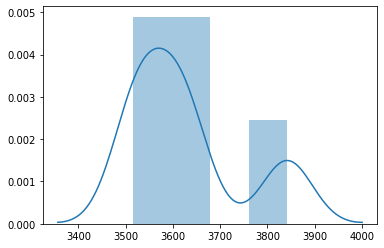

In [379]:
x=URpp.agg('sum')
sns.distplot(x)

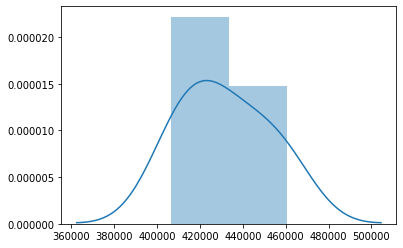

In [378]:
sns.distplot(so_data_USA.agg('sum'))


In [346]:
len(so_data_USA) # 163 USA universities

163

In [347]:
so_data_USA=so_data_USA.set_index('institution_name')

In [349]:
so_data_USA.agg('sum')

2014    406395
2015    418152
2016    427558
2017    443910
2018    460523
dtype: int64

In [411]:
so_data_USA=so_data_USA.reset_index()

In [412]:
so_data_USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
institution_name    163 non-null object
2014                163 non-null int64
2015                163 non-null int64
2016                163 non-null int64
2017                163 non-null int64
2018                163 non-null int64
Total               0 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 9.0+ KB


In [391]:
sep_sum=lambda x: x.agg('sum')

In [417]:
so_data_USA['Total']=so_data_USA.sum(axis=1)

In [421]:
so_data_USA['Total']=so_data_USA.Total.astype(int)
so_data_USA.head()

,institution_name,2014,2015,2016,2017,2018,Total
0,"Jet Propulsion Laboratory, California Institut...",1913,1800,2181,2052,2200,10146
1,California Institute of Technology,4518,4347,4553,4567,4884,22869
2,Stanford University,12801,13656,13664,14233,14729,69083
3,Massachusetts Institute of Technology,9645,9957,10023,10191,10458,50274
4,Princeton University,4335,4629,4544,4635,4891,23034


In [423]:
URpp=URpp.reset_index()

In [424]:
URpp['Total']=URpp.sum(axis=1)

In [425]:
URpp

,institution_name,2014,2015,2016,2017,2018,Total
0,University of Rochester,3602,3540,3515,3633,3842,18132


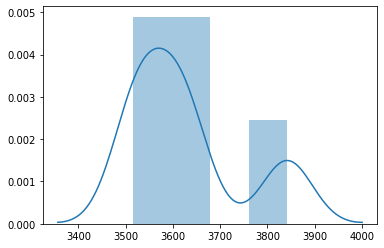

In [429]:
# UR Publs Distribution
inputdata=URpp[['2014','2015','2016','2017','2018']]
sns.distplot(inputdata)

# seems a bi-modal distribution but the overall trend is downward

# Top 1% and top 10% highly cited publications 

In [436]:
pp_data.head()

,country,countryCode,institution_id,link,institution_name,metricType,t1_2014,t1_2015,t1_2016,t1_2017,...,t25_2014,t25_2015,t25_2016,t25_2017,t25_2018,t25_percent2014,t25_percent2015,t25_percent2016,t25_percent2017,t25_percent2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,PublicationsInTopJournalPercentiles,686.0,846.0,887.0,771.0,...,8098.0,8796.0,9089.0,9372.0,10096.0,73.77915,75.321110,73.55345,74.210150,74.923935
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",PublicationsInTopJournalPercentiles,74.0,82.0,83.0,71.0,...,1012.0,1056.0,1215.0,1195.0,1233.0,67.55675,73.333336,67.42509,66.536750,64.185320
2,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,PublicationsInTopJournalPercentiles,686.0,846.0,887.0,771.0,...,8098.0,8796.0,9089.0,9372.0,10096.0,73.77915,75.321110,73.55345,74.210150,74.923935
3,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",PublicationsInTopJournalPercentiles,74.0,82.0,83.0,71.0,...,1012.0,1056.0,1215.0,1195.0,1233.0,67.55675,73.333336,67.42509,66.536750,64.185320
4,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,PublicationsInTopJournalPercentiles,305.0,245.0,259.0,253.0,...,2948.0,2945.0,3094.0,3108.0,3251.0,76.41265,79.102875,77.93451,76.835594,74.752820


In [437]:
USA_pp=pp_data[pp_data.countryCode=='USA']

In [439]:
len(USA_pp)

164

In [441]:
# we want t1 and t10 values

USA_pp.head()

,country,countryCode,institution_id,link,institution_name,metricType,t1_2014,t1_2015,t1_2016,t1_2017,...,t25_2014,t25_2015,t25_2016,t25_2017,t25_2018,t25_percent2014,t25_percent2015,t25_percent2016,t25_percent2017,t25_percent2018
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",PublicationsInTopJournalPercentiles,74.0,82.0,83.0,71.0,...,1012.0,1056.0,1215.0,1195.0,1233.0,67.55675,73.333336,67.425090,66.536750,64.18532
3,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",PublicationsInTopJournalPercentiles,74.0,82.0,83.0,71.0,...,1012.0,1056.0,1215.0,1195.0,1233.0,67.55675,73.333336,67.425090,66.536750,64.18532
4,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,PublicationsInTopJournalPercentiles,305.0,245.0,259.0,253.0,...,2948.0,2945.0,3094.0,3108.0,3251.0,76.41265,79.102875,77.934510,76.835594,74.75282
6,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,PublicationsInTopJournalPercentiles,954.0,1016.0,1073.0,1027.0,...,8211.0,8963.0,8819.0,9276.0,9716.0,75.16478,76.541420,74.535164,75.279980,74.75571
7,United States,USA,508111,{'@href': 'https://api.elsevier.com/analytics/...,Massachusetts Institute of Technology,PublicationsInTopJournalPercentiles,820.0,818.0,918.0,822.0,...,5930.0,6190.0,6450.0,6475.0,6957.0,75.70535,75.839260,76.813150,77.120056,78.15975


In [442]:
USA_pp.columns

Index(['country', 'countryCode', 'institution_id', 'link', 'institution_name',
       'metricType', 't1_2014', 't1_2015', 't1_2016', 't1_2017', 't1_2018',
       't1_percent2014', 't1_percent2015', 't1_percent2016', 't1_percent2017',
       't1_percent2018', 't5_2014', 't5_2015', 't5_2016', 't5_2017', 't5_2018',
       't5_percent2014', 't5_percent2015', 't5_percent2016', 't5_percent2017',
       't5_percent2018', 't10_2014', 't10_2015', 't10_2016', 't10_2017',
       't10_2018', 't10_percent2014', 't10_percent2015', 't10_percent2016',
       't10_percent2017', 't10_percent2018', 't25_2014', 't25_2015',
       't25_2016', 't25_2017', 't25_2018', 't25_percent2014',
       't25_percent2015', 't25_percent2016', 't25_percent2017',
       't25_percent2018'],
      dtype='object')

In [443]:
USA_pp=USA_pp.loc[:][['institution_name','t1_2014','t1_2015','t1_2016','t1_2017','t1_2018','t10_2014','t10_2015','t10_2016','t10_2017','t10_2018']]

In [445]:
USA_pp=USA_pp.drop_duplicates()

In [447]:
USA_pp=USA_pp.reset_index()

In [449]:
USA_pp=USA_pp.iloc[:,1:]

In [450]:
USA_pp.head()

,institution_name,t1_2014,t1_2015,t1_2016,t1_2017,t1_2018,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018
0,"Jet Propulsion Laboratory, California Institut...",74.0,82.0,83.0,71.0,123.0,455.0,483.0,694.0,687.0,679.0
1,California Institute of Technology,305.0,245.0,259.0,253.0,293.0,1709.0,1579.0,2051.0,1906.0,1967.0
2,Stanford University,954.0,1016.0,1073.0,1027.0,1025.0,5558.0,6068.0,5974.0,6233.0,6307.0
3,Massachusetts Institute of Technology,820.0,818.0,918.0,822.0,869.0,4401.0,4418.0,4689.0,4613.0,4781.0
4,Princeton University,271.0,269.0,227.0,241.0,253.0,1810.0,1740.0,1916.0,1871.0,1990.0


In [451]:
USA_pp['2014_Total']=USA_pp.loc[:][['t1_2014','t10_2014']].sum(axis=1)

In [452]:
USA_pp.head()

,institution_name,t1_2014,t1_2015,t1_2016,t1_2017,t1_2018,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018,2014_Total
0,"Jet Propulsion Laboratory, California Institut...",74.0,82.0,83.0,71.0,123.0,455.0,483.0,694.0,687.0,679.0,529.0
1,California Institute of Technology,305.0,245.0,259.0,253.0,293.0,1709.0,1579.0,2051.0,1906.0,1967.0,2014.0
2,Stanford University,954.0,1016.0,1073.0,1027.0,1025.0,5558.0,6068.0,5974.0,6233.0,6307.0,6512.0
3,Massachusetts Institute of Technology,820.0,818.0,918.0,822.0,869.0,4401.0,4418.0,4689.0,4613.0,4781.0,5221.0
4,Princeton University,271.0,269.0,227.0,241.0,253.0,1810.0,1740.0,1916.0,1871.0,1990.0,2081.0


In [453]:
USA_pp['2015_Total']=USA_pp.loc[:][['t1_2015','t10_2015']].sum(axis=1)
USA_pp['2016_Total']=USA_pp.loc[:][['t1_2016','t10_2016']].sum(axis=1)
USA_pp['2017_Total']=USA_pp.loc[:][['t1_2017','t10_2017']].sum(axis=1)
USA_pp['2018_Total']=USA_pp.loc[:][['t1_2018','t10_2018']].sum(axis=1)

In [454]:
USA_pp.head()

,institution_name,t1_2014,t1_2015,t1_2016,t1_2017,t1_2018,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018,2014_Total,2015_Total,2016_Total,2017_Total,2018_Total
0,"Jet Propulsion Laboratory, California Institut...",74.0,82.0,83.0,71.0,123.0,455.0,483.0,694.0,687.0,679.0,529.0,565.0,777.0,758.0,802.0
1,California Institute of Technology,305.0,245.0,259.0,253.0,293.0,1709.0,1579.0,2051.0,1906.0,1967.0,2014.0,1824.0,2310.0,2159.0,2260.0
2,Stanford University,954.0,1016.0,1073.0,1027.0,1025.0,5558.0,6068.0,5974.0,6233.0,6307.0,6512.0,7084.0,7047.0,7260.0,7332.0
3,Massachusetts Institute of Technology,820.0,818.0,918.0,822.0,869.0,4401.0,4418.0,4689.0,4613.0,4781.0,5221.0,5236.0,5607.0,5435.0,5650.0
4,Princeton University,271.0,269.0,227.0,241.0,253.0,1810.0,1740.0,1916.0,1871.0,1990.0,2081.0,2009.0,2143.0,2112.0,2243.0


In [455]:
UR_percentile=USA_pp[USA_pp.institution_name=='University of Rochester']

In [457]:
UR_percentile=UR_percentile.set_index('institution_name')

In [458]:
UR_percentile

,t1_2014,t1_2015,t1_2016,t1_2017,t1_2018,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018,2014_Total,2015_Total,2016_Total,2017_Total,2018_Total
institution_name,,,,,,,,,,,,,,,
University of Rochester,162.0,164.0,143.0,138.0,133.0,1404.0,1308.0,1310.0,1309.0,1318.0,1566.0,1472.0,1453.0,1447.0,1451.0


In [459]:
basedata=UR_percentile[['2014_Total','2015_Total','2016_Total','2017_Total','2018_Total']]

In [464]:
basedata

,2014_Total,2015_Total,2016_Total,2017_Total,2018_Total
institution_name,,,,,
University of Rochester,1566.0,1472.0,1453.0,1447.0,1451.0


In [462]:
smalldata=UR_percentile.iloc[:,:10]

In [465]:
smalldata1=smalldata.loc[:][['t1_2014','t1_2015','t1_2016','t1_2017','t1_2018']]

In [467]:
smalldata1

,t1_2014,t1_2015,t1_2016,t1_2017,t1_2018
institution_name,,,,,
University of Rochester,162.0,164.0,143.0,138.0,133.0


In [466]:
smalldata2=smalldata.loc[:][['t10_2014','t10_2015','t10_2016','t10_2017','t10_2018']]

In [468]:
smalldata2

,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018
institution_name,,,,,
University of Rochester,1404.0,1308.0,1310.0,1309.0,1318.0


In [478]:
# UR's ScholarlyOutput

so_data_USA.head()

,institution_name,2014,2015,2016,2017,2018,Total
0,"Jet Propulsion Laboratory, California Institut...",1913,1800,2181,2052,2200,10146
1,California Institute of Technology,4518,4347,4553,4567,4884,22869
2,Stanford University,12801,13656,13664,14233,14729,69083
3,Massachusetts Institute of Technology,9645,9957,10023,10191,10458,50274
4,Princeton University,4335,4629,4544,4635,4891,23034


In [479]:
UR_so=so_data_USA[so_data_USA.institution_name=='University of Rochester']

In [486]:
UR_so
del UR_so['Total']

In [513]:
UR_so

,2014,2015,2016,2017,2018
institution_name,,,,,
University of Rochester,3602,3540,3515,3633,3842


In [514]:
combinedata=pd.DataFrame({'2014':[int(162.0),int(1404.0),3602], '2015':[int(164.0),int(1308.0), 3540],
                         '2016':[int(143.0), int(1310.0),3515],
                         '2017':[int(138.0),int(1309.0),3633],
                         '2018':[int(133.0), int(1318.0),3842]})

In [515]:
combinedata

,2014,2015,2016,2017,2018
0,162,164,143,138,133
1,1404,1308,1310,1309,1318
2,3602,3540,3515,3633,3842


In [516]:
data_1=combinedata.iloc[2,:]
data_2=combinedata.iloc[1,:]
data_3=combinedata.iloc[0,:]

In [532]:
data_1

2014    3602
2015    3540
2016    3515
2017    3633
2018    3842
Name: 2, dtype: int64

In [533]:
A=pd.DataFrame(data=[data_1[:5]], columns=['2014','2015','2016','2017','2018'])

In [534]:
A

,2014,2015,2016,2017,2018
2,3602,3540,3515,3633,3842


In [535]:
B=pd.DataFrame(data=[data_2[:5]], columns=['2014','2015','2016','2017','2018'])

In [536]:
C=pd.DataFrame(data=[data_3[:5]], columns=['2014','2015','2016','2017','2018'])

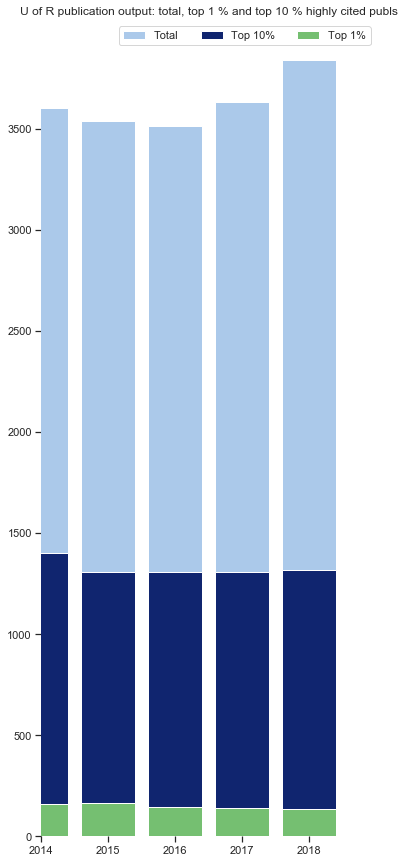

In [538]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
sns.set_style("ticks", {"xtick.major.size": 10, "ytick.major.size": 8})

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(data=A,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("dark")
sns.barplot(data=B,
            label="Top 10%", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(data=C,
            label="Top 1%", color="g")


# Add a legend and informative axis label
plt.yticks(np.arange(0, 4000, step=500))
plt.xticks(np.arange(5), ('2014', '2015', '2016', '2017', '2018'))
ax.legend(ncol=3, loc="upper right", frameon=True)
ax.set(xlim=(0,5), ylabel="",
       title="U of R publication output: total, top 1 % and top 10 % highly cited publs")
sns.despine(left=True, bottom=True)

# From 2014-2018 ,our top 1% cited publs and top10% cited pulbs slightly dropped a little, but because our 2018 total publs increased a lot, our % pulb. cited would drop

# Trends in FWCI values of total U of R publication output

In [539]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\FNCI"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\FNCI


In [540]:
FWCI_all=pd.read_csv('THE_ALLUNI_FWCI.csv')

In [541]:
FWCI_all.head()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,FieldWeightedCitationImpact,2.232452,2.178834,2.202485,1.966025,1.804821
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",FieldWeightedCitationImpact,1.611136,1.462793,1.656759,1.470790,1.346227
2,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,FieldWeightedCitationImpact,1.890797,1.740487,1.921985,1.847315,1.605074
3,United Kingdom,GBR,315068,{'@href': 'https://api.elsevier.com/analytics/...,University of Cambridge,FieldWeightedCitationImpact,1.904510,1.990053,2.050378,1.946377,1.763683
4,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,FieldWeightedCitationImpact,2.445251,2.476393,2.568147,2.269981,2.244260


In [548]:
UR_FWCI=FWCI_all[FWCI_all.institution_name=='University of Rochester']

In [550]:
UR_FWCI=UR_FWCI.iloc[:, -7:]

In [553]:
del UR_FWCI['metricType']

In [556]:
UR_FWCI

,institution_name,2014,2015,2016,2017,2018
1259,University of Rochester,1.827581,2.117681,1.646356,1.700714,1.717541


# UofR FWCI

Text(0, 0.5, 'Filed-weighted Cited Index')

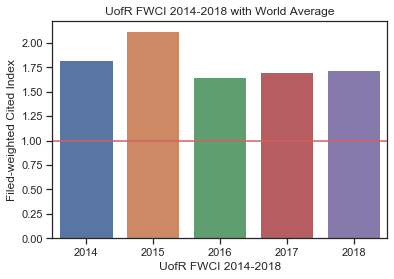

In [573]:
sns.barplot(data=UR_FWCI)
plt.axhline(1.00, ls='-', color='r')
plt.title('UofR FWCI 2014-2018 with World Average')
plt.xlabel("UofR FWCI 2014-2018")
plt.ylabel("Filed-weighted Cited Index")

# Our FWCI have always been above global average which is 1.00 

# Comparator analysis: top 10 % highly cited publications for USA universities

In [574]:
USA_pp.head()

,institution_name,t1_2014,t1_2015,t1_2016,t1_2017,t1_2018,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018,2014_Total,2015_Total,2016_Total,2017_Total,2018_Total
0,"Jet Propulsion Laboratory, California Institut...",74.0,82.0,83.0,71.0,123.0,455.0,483.0,694.0,687.0,679.0,529.0,565.0,777.0,758.0,802.0
1,California Institute of Technology,305.0,245.0,259.0,253.0,293.0,1709.0,1579.0,2051.0,1906.0,1967.0,2014.0,1824.0,2310.0,2159.0,2260.0
2,Stanford University,954.0,1016.0,1073.0,1027.0,1025.0,5558.0,6068.0,5974.0,6233.0,6307.0,6512.0,7084.0,7047.0,7260.0,7332.0
3,Massachusetts Institute of Technology,820.0,818.0,918.0,822.0,869.0,4401.0,4418.0,4689.0,4613.0,4781.0,5221.0,5236.0,5607.0,5435.0,5650.0
4,Princeton University,271.0,269.0,227.0,241.0,253.0,1810.0,1740.0,1916.0,1871.0,1990.0,2081.0,2009.0,2143.0,2112.0,2243.0


In [575]:
UR_peer=['Boston University','Carnegie Mellon University','Case Western Reserve University','Duke University','Emory University',
        'Northwestern University','Vanderbilt University','Washington University','Johns Hopkins University','New York University',
        'Stanford University','Tulane University','University of Chicago','University of Pennsylvania','University of Southern California']

In [581]:
UR_peer_df=pd.DataFrame({'UR_Peer':UR_peer})

In [613]:
UR_peer_df

,UR_Peer
0,Boston University
1,Carnegie Mellon University
2,Case Western Reserve University
3,Duke University
4,Emory University
5,Northwestern University
6,Vanderbilt University
7,Washington University
8,Johns Hopkins University
9,New York University


In [616]:
result=[]

for name in UR_peer_df.UR_Peer:
    if USA_pp[USA_pp.institution_name==name] is not None:
        result.append(1)
    else:
        result.append(0)
        
len(result)

15

In [595]:
data=[]
for name in UR_peer:
    if name in USA_pp.institution_name:
        data.append('T')
    else:
        data.append('F')
        
data

['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F']

In [588]:
UR_peer_df.loc[:]['Result']=data

In [624]:
UR_peer_df['UR_Peer']

0                     Boston University
1            Carnegie Mellon University
2       Case Western Reserve University
3                       Duke University
4                      Emory University
5               Northwestern University
6                 Vanderbilt University
7                 Washington University
8              Johns Hopkins University
9                   New York University
10                  Stanford University
11                    Tulane University
12                University of Chicago
13           University of Pennsylvania
14    University of Southern California
Name: UR_Peer, dtype: object

# Get UofR's Global set's Publication in Top Journal Percentile

In [626]:
chuck=[]
for name in UR_peer_df['UR_Peer']: 
    chuck.append(USA_pp[USA_pp.institution_name==name])

In [628]:
DF=pd.concat(chuck, ignore_index=True)

In [629]:
DF.head()

,institution_name,t1_2014,t1_2015,t1_2016,t1_2017,t1_2018,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018,2014_Total,2015_Total,2016_Total,2017_Total,2018_Total
0,Boston University,309.0,320.0,365.0,351.0,369.0,2219.0,2296.0,2421.0,2580.0,2564.0,2528.0,2616.0,2786.0,2931.0,2933.0
1,Case Western Reserve University,174.0,172.0,206.0,198.0,163.0,1516.0,1551.0,1572.0,1594.0,1513.0,1690.0,1723.0,1778.0,1792.0,1676.0
2,Duke University,541.0,508.0,563.0,543.0,478.0,3823.0,3910.0,3747.0,3828.0,3875.0,4364.0,4418.0,4310.0,4371.0,4353.0
3,Northwestern University,511.0,526.0,621.0,527.0,603.0,3313.0,3412.0,3524.0,3682.0,3636.0,3824.0,3938.0,4145.0,4209.0,4239.0
4,Vanderbilt University,295.0,339.0,320.0,316.0,335.0,2301.0,2355.0,2516.0,2516.0,2492.0,2596.0,2694.0,2836.0,2832.0,2827.0


In [633]:
UR_percentile=UR_percentile.reset_index()

In [632]:
Global_top10=DF.loc[:][['institution_name','t10_2014','t10_2015','t10_2016','t10_2017','t10_2018']]

In [634]:
UR_pcer_top10=UR_percentile.loc[:][['institution_name','t10_2014','t10_2015','t10_2016','t10_2017','t10_2018']]

In [635]:
Global_top10.head()

,institution_name,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018
0,Boston University,2219.0,2296.0,2421.0,2580.0,2564.0
1,Case Western Reserve University,1516.0,1551.0,1572.0,1594.0,1513.0
2,Duke University,3823.0,3910.0,3747.0,3828.0,3875.0
3,Northwestern University,3313.0,3412.0,3524.0,3682.0,3636.0
4,Vanderbilt University,2301.0,2355.0,2516.0,2516.0,2492.0


In [637]:
Global_top10['Top10_Total']=Global_top10.sum(axis=1)

In [638]:
Global_top10.head()

,institution_name,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018,Top10_Total
0,Boston University,2219.0,2296.0,2421.0,2580.0,2564.0,12080.0
1,Case Western Reserve University,1516.0,1551.0,1572.0,1594.0,1513.0,7746.0
2,Duke University,3823.0,3910.0,3747.0,3828.0,3875.0,19183.0
3,Northwestern University,3313.0,3412.0,3524.0,3682.0,3636.0,17567.0
4,Vanderbilt University,2301.0,2355.0,2516.0,2516.0,2492.0,12180.0


In [661]:
len(Global_top10)

11

In [636]:
UR_pcer_top10

,institution_name,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018
0,University of Rochester,1404.0,1308.0,1310.0,1309.0,1318.0


In [639]:
UR_pcer_top10['Top10_Total']=UR_pcer_top10.sum(axis=1)

In [640]:
UR_pcer_top10

,institution_name,t10_2014,t10_2015,t10_2016,t10_2017,t10_2018,Top10_Total
0,University of Rochester,1404.0,1308.0,1310.0,1309.0,1318.0,6649.0


In [641]:
Gall=pd.concat([Global_top10, UR_pcer_top10])

In [660]:
len(Gall)

12

In [647]:
import re

In [658]:
abb=[]
for i in Gall.institution_name:
    abb.append(i.split("\t")[0].strip(" "))
abb

['Boston University',
 'Case Western Reserve University',
 'Duke University',
 'Northwestern University',
 'Vanderbilt University',
 'Johns Hopkins University',
 'New York University',
 'Stanford University',
 'Tulane University',
 'University of Chicago',
 'University of Pennsylvania',
 'University of Rochester']

In [682]:
Gall['UniAbbr']=['Boston','CWRU','Duke','Northwestern','Vanderbilt','JohnsHopkins','NYU','Stanford','Tulane','UofChicago','UofPenn','UofR']

In [684]:
Gall=Gall.sort_values(by='Top10_Total', ascending=False)

# Comparator analysis: top 10% highly cited publications UR and GlobalPeers

In [699]:
for index, row in Gall.iterrows():
    print(row.UniAbbr)
    print(int(row.Top10_Total))

Stanford
30140
JohnsHopkins
26670
UofPenn
23969
Duke
19183
UofChicago
18983
NYU
18246
Northwestern
17567
Vanderbilt
12180
Boston
12080
CWRU
7746
UofR
6649
Tulane
3003


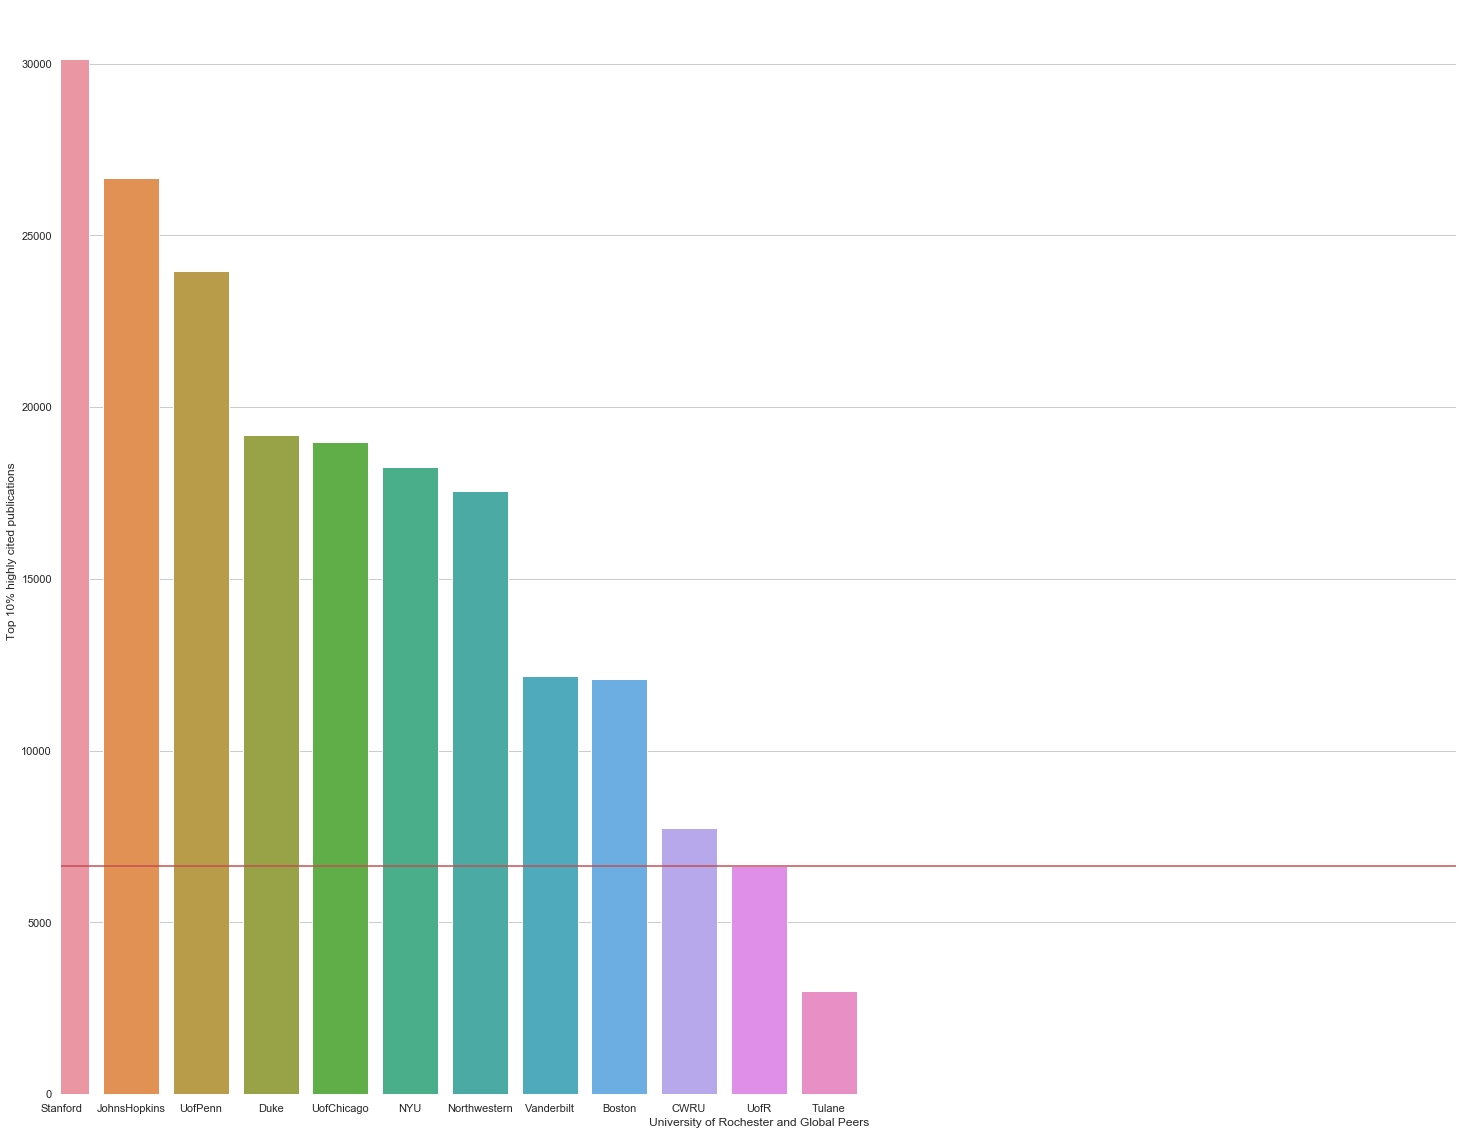

In [791]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))
sns.barplot(x=Gall.UniAbbr, y=Gall.Top10_Total, data=Gall)
plt.axhline(6649, ls='-', color='r')

#ax.text(Gall.UniAbbr, Gall.Top10_Total,color='black', ha="center")

# Add a legend and informative axis label
#ax.legend(ncol=12, loc="upper right", frameon=True)
ax.set(xlim=(0, 20),
       xlabel="University of Rochester and Global Peers", ylabel="Top 10% highly cited publications")
sns.despine(left=True, bottom=True)

# Among our other 11 USA peers, our top 10% highly-cited pulbs ranks behind 

# Comparator analysis: Field-weighted Citation Impact

In [709]:
fwci_data.head()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,FieldWeightedCitationImpact,2.232452,2.178834,2.202485,1.966025,1.804821
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",FieldWeightedCitationImpact,1.611136,1.462793,1.656759,1.470790,1.346227
2,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,FieldWeightedCitationImpact,1.890797,1.740487,1.921985,1.847315,1.605074
3,United Kingdom,GBR,315068,{'@href': 'https://api.elsevier.com/analytics/...,University of Cambridge,FieldWeightedCitationImpact,1.904510,1.990053,2.050378,1.946377,1.763683
4,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,FieldWeightedCitationImpact,2.445251,2.476393,2.568147,2.269981,2.244260


In [711]:
US_fwci=fwci_data[fwci_data.countryCode=='USA']

In [712]:
US_fwci.head()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",FieldWeightedCitationImpact,1.611136,1.462793,1.656759,1.470790,1.346227
2,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,FieldWeightedCitationImpact,1.890797,1.740487,1.921985,1.847315,1.605074
4,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,FieldWeightedCitationImpact,2.445251,2.476393,2.568147,2.269981,2.244260
5,United States,USA,508111,{'@href': 'https://api.elsevier.com/analytics/...,Massachusetts Institute of Technology,FieldWeightedCitationImpact,2.271606,2.301666,2.355942,2.132760,1.971292
6,United States,USA,508191,{'@href': 'https://api.elsevier.com/analytics/...,Princeton University,FieldWeightedCitationImpact,2.111493,2.144071,2.101741,1.906495,1.919808


In [713]:
UR_peer_df

,UR_Peer
0,Boston University
1,Carnegie Mellon University
2,Case Western Reserve University
3,Duke University
4,Emory University
5,Northwestern University
6,Vanderbilt University
7,Washington University
8,Johns Hopkins University
9,New York University


In [715]:
len(Gall.institution_name) # Global peers and UofR

12

In [759]:
chuck=[]

for name in Gall.institution_name:
    if US_fwci[US_fwci.institution_name==name] is not None:
        chuck.append(US_fwci[US_fwci.institution_name==name])

In [760]:
UR_Peer_FWCI=pd.concat(chuck, ignore_index=True)

In [761]:
UR_Peer_FWCI

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018
0,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,FieldWeightedCitationImpact,2.445251,2.476393,2.568147,2.269981,2.244260
1,United States,USA,508094,{'@href': 'https://api.elsevier.com/analytics/...,Johns Hopkins University,FieldWeightedCitationImpact,2.039671,2.063183,2.086808,1.941970,1.903996
2,United States,USA,508331,{'@href': 'https://api.elsevier.com/analytics/...,University of Pennsylvania,FieldWeightedCitationImpact,2.049064,2.078196,2.042546,1.896038,1.865539
3,United States,USA,508053,{'@href': 'https://api.elsevier.com/analytics/...,Duke University,FieldWeightedCitationImpact,2.060966,2.188656,1.971610,1.903780,1.848280
4,United States,USA,508270,{'@href': 'https://api.elsevier.com/analytics/...,University of Chicago,FieldWeightedCitationImpact,1.899739,1.866923,2.041074,1.860755,1.800015
5,United States,USA,508166,{'@href': 'https://api.elsevier.com/analytics/...,New York University,FieldWeightedCitationImpact,2.036910,2.071903,1.961854,1.787898,1.819667
6,United States,USA,508166,{'@href': 'https://api.elsevier.com/analytics/...,New York University,FieldWeightedCitationImpact,2.036910,2.071903,1.961854,1.787898,1.819667
7,United States,USA,508175,{'@href': 'https://api.elsevier.com/analytics/...,Northwestern University,FieldWeightedCitationImpact,1.814437,2.036129,2.104611,2.028618,1.968102
8,United States,USA,508175,{'@href': 'https://api.elsevier.com/analytics/...,Northwestern University,FieldWeightedCitationImpact,1.814437,2.036129,2.104611,2.028618,1.968102
9,United States,USA,508363,{'@href': 'https://api.elsevier.com/analytics/...,Vanderbilt University,FieldWeightedCitationImpact,1.935092,2.053712,1.799374,1.751226,1.698510


In [719]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\FNCI"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\FNCI


In [720]:
UR_Peer_FWCI.to_csv('UR_Global_Peer_FWCI_Comparison.csv', index=False)

In [762]:
UR_Peer_FWCI=UR_Peer_FWCI.iloc[:, -7:]

In [763]:
UR_Peer_FWCI

,institution_name,metricType,2014,2015,2016,2017,2018
0,Stanford University,FieldWeightedCitationImpact,2.445251,2.476393,2.568147,2.269981,2.244260
1,Johns Hopkins University,FieldWeightedCitationImpact,2.039671,2.063183,2.086808,1.941970,1.903996
2,University of Pennsylvania,FieldWeightedCitationImpact,2.049064,2.078196,2.042546,1.896038,1.865539
3,Duke University,FieldWeightedCitationImpact,2.060966,2.188656,1.971610,1.903780,1.848280
4,University of Chicago,FieldWeightedCitationImpact,1.899739,1.866923,2.041074,1.860755,1.800015
5,New York University,FieldWeightedCitationImpact,2.036910,2.071903,1.961854,1.787898,1.819667
6,New York University,FieldWeightedCitationImpact,2.036910,2.071903,1.961854,1.787898,1.819667
7,Northwestern University,FieldWeightedCitationImpact,1.814437,2.036129,2.104611,2.028618,1.968102
8,Northwestern University,FieldWeightedCitationImpact,1.814437,2.036129,2.104611,2.028618,1.968102
9,Vanderbilt University,FieldWeightedCitationImpact,1.935092,2.053712,1.799374,1.751226,1.698510


In [741]:
Gall.UniAbbr

7         Stanford
5     JohnsHopkins
10         UofPenn
2             Duke
9       UofChicago
6              NYU
3     Northwestern
4       Vanderbilt
0           Boston
1             CWRU
0             UofR
8           Tulane
Name: UniAbbr, dtype: object

In [771]:
abb=[]
for name in Gall.UniAbbr:
    abb.append(name)
abb

['Stanford',
 'JohnsHopkins',
 'UofPenn',
 'Duke',
 'UofChicago',
 'NYU',
 'Northwestern',
 'Vanderbilt',
 'Boston',
 'CWRU',
 'UofR',
 'Tulane']

In [764]:
UR_Peer_FWCI=UR_Peer_FWCI.drop_duplicates()

In [765]:
UR_Peer_FWCI.reset_index(inplace=True, drop=True)

In [774]:
UR_Peer_FWCI.loc[:]['UniAbbr']=abb

In [775]:
UR_Peer_FWCI.head()

,institution_name,metricType,2014,2015,2016,2017,2018,UniAbbr
0,Stanford University,FieldWeightedCitationImpact,2.445251,2.476393,2.568147,2.269981,2.244260,Stanford
1,Johns Hopkins University,FieldWeightedCitationImpact,2.039671,2.063183,2.086808,1.941970,1.903996,JohnsHopkins
2,University of Pennsylvania,FieldWeightedCitationImpact,2.049064,2.078196,2.042546,1.896038,1.865539,UofPenn
3,Duke University,FieldWeightedCitationImpact,2.060966,2.188656,1.971610,1.903780,1.848280,Duke
4,University of Chicago,FieldWeightedCitationImpact,1.899739,1.866923,2.041074,1.860755,1.800015,UofChicago


In [777]:
UR_Peer_FWCI.loc[:]['AVERAGE_FWCI']=round(UR_Peer_FWCI[['2014','2015','2016','2017','2018']].mean(axis=1), 4)

In [778]:
UR_Peer_FWCI=UR_Peer_FWCI.sort_values(by='AVERAGE_FWCI', ascending=False)

In [779]:
UR_Peer_FWCI.head()

,institution_name,metricType,2014,2015,2016,2017,2018,UniAbbr,AVERAGE_FWCI
0,Stanford University,FieldWeightedCitationImpact,2.445251,2.476393,2.568147,2.269981,2.244260,Stanford,2.4008
1,Johns Hopkins University,FieldWeightedCitationImpact,2.039671,2.063183,2.086808,1.941970,1.903996,JohnsHopkins,2.0071
3,Duke University,FieldWeightedCitationImpact,2.060966,2.188656,1.971610,1.903780,1.848280,Duke,1.9947
6,Northwestern University,FieldWeightedCitationImpact,1.814437,2.036129,2.104611,2.028618,1.968102,Northwestern,1.9904
2,University of Pennsylvania,FieldWeightedCitationImpact,2.049064,2.078196,2.042546,1.896038,1.865539,UofPenn,1.9863


In [785]:
UR_Peer_FWCI[UR_Peer_FWCI.UniAbbr=='UofR']

,institution_name,metricType,2014,2015,2016,2017,2018,UniAbbr,AVERAGE_FWCI
10,University of Rochester,FieldWeightedCitationImpact,1.827581,2.117681,1.646356,1.700714,1.717541,UofR,1.802


# Comparatory analysis: Field-weighted Citation Impact

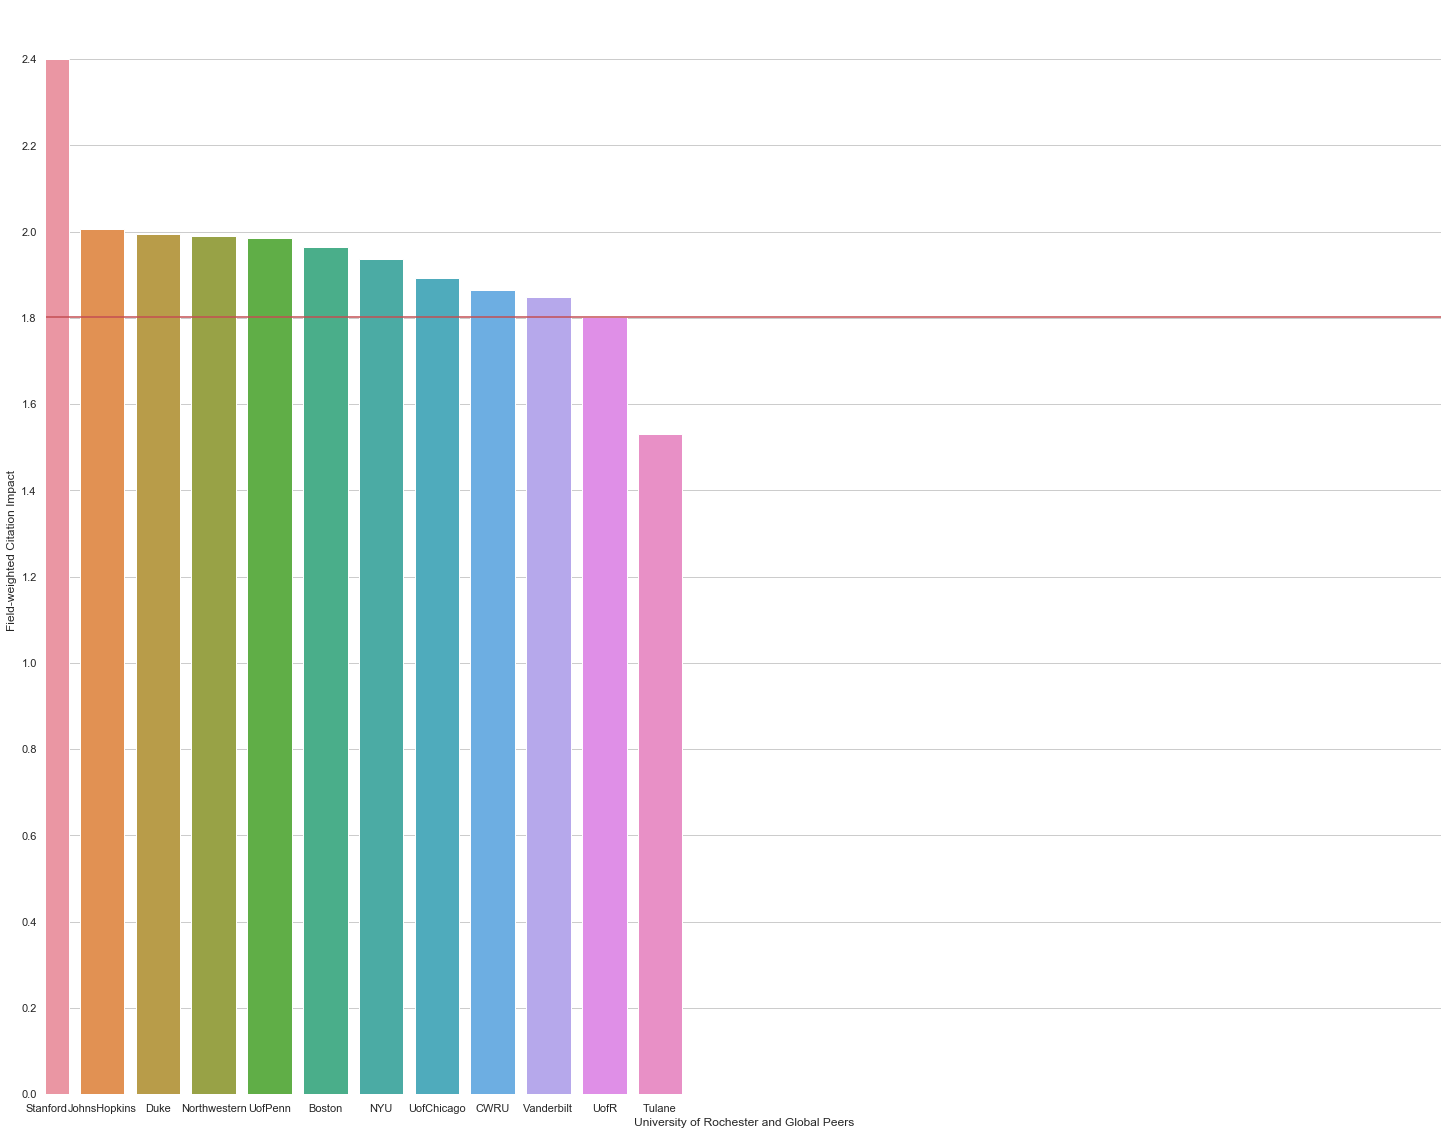

In [790]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))
sns.barplot(x=UR_Peer_FWCI.UniAbbr, y=UR_Peer_FWCI.AVERAGE_FWCI, data=UR_Peer_FWCI)
plt.axhline(1.802, ls='-', color='r')

#ax.text(Gall.UniAbbr, Gall.Top10_Total,color='black', ha="center")

# Add a legend and informative axis label
#ax.legend(ncol=12, loc="upper right", frameon=True)
plt.yticks(np.arange(0, 2.5, step=0.2))
ax.set(xlim=(0, 25),
       xlabel="University of Rochester and Global Peers", ylabel="Field-weighted Citation Impact")
sns.despine(left=True, bottom=True)

# Our average FWCI 2014-2018 is 1.8, but most of our USA peers have higher FWCI, this may be the reason our overall score did not reflect our good FWCI

# Comparatory analysis: research performance profile

In [793]:
UR_Peer_FWCI.institution_name

0                 Stanford University
1            Johns Hopkins University
3                     Duke University
6             Northwestern University
2          University of Pennsylvania
8                   Boston University
5                 New York University
4               University of Chicago
9     Case Western Reserve University
7               Vanderbilt University
10            University of Rochester
11                  Tulane University
Name: institution_name, dtype: object

In [794]:
so_data_USA.head()

,institution_name,2014,2015,2016,2017,2018,Total
0,"Jet Propulsion Laboratory, California Institut...",1913,1800,2181,2052,2200,10146
1,California Institute of Technology,4518,4347,4553,4567,4884,22869
2,Stanford University,12801,13656,13664,14233,14729,69083
3,Massachusetts Institute of Technology,9645,9957,10023,10191,10458,50274
4,Princeton University,4335,4629,4544,4635,4891,23034


In [800]:
chuck=[]

for name in UR_Peer_FWCI.institution_name:
    chuck.append(so_data_USA[so_data_USA.institution_name==name])

In [801]:
Ttl_publs_output=pd.concat(chuck, ignore_index=True)

In [883]:
A=Ttl_publs_output[['institution_name','Total']]

In [807]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PercPublsCited"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PercPublsCited


In [808]:
ALL_PP=pd.read_csv("THEUNI_CITEDPUBLS.csv")

In [809]:
ALL_PP.head()

,country,countryCode,institution_id,link,institution_name,metricType,2014,2015,2016,2017,2018,percent2014,percent2015,percent2016,percent2017,percent2018
0,United Kingdom,GBR,315091,{'@href': 'https://api.elsevier.com/analytics/...,University of Oxford,CitedPublications,10893.0,11679.0,11798.0,11474.0,10570.0,86.555420,85.53537,84.115210,78.56213,70.69761
1,United States,USA,508092,{'@href': 'https://api.elsevier.com/analytics/...,"Jet Propulsion Laboratory, California Institut...",CitedPublications,1514.0,1451.0,1722.0,1588.0,1406.0,79.142710,80.61111,78.954605,77.38792,63.90909
2,United States,USA,508021,{'@href': 'https://api.elsevier.com/analytics/...,California Institute of Technology,CitedPublications,3879.0,3770.0,3914.0,3779.0,3487.0,85.856575,86.72648,85.965300,82.74578,71.39640
3,United Kingdom,GBR,315068,{'@href': 'https://api.elsevier.com/analytics/...,University of Cambridge,CitedPublications,9116.0,9238.0,9558.0,9125.0,8418.0,88.060280,86.17537,84.330330,79.49991,71.42372
4,United States,USA,508219,{'@href': 'https://api.elsevier.com/analytics/...,Stanford University,CitedPublications,11156.0,11846.0,11699.0,11642.0,10731.0,87.149445,86.74575,85.619150,81.79583,72.85627


In [810]:
US_PP=ALL_PP[ALL_PP.countryCode=='USA']

In [811]:
chuck=[]

for name in UR_Peer_FWCI.institution_name:
    chuck.append(US_PP[US_PP.institution_name==name])

In [812]:
UR_Peer_PP=pd.concat(chuck, ignore_index=True)

In [815]:
UR_Peer_PP=UR_Peer_PP[['institution_name','percent2014','percent2015','percent2016','percent2017','percent2018']]

In [818]:
UR_Peer_PP=UR_Peer_PP.drop_duplicates()

In [819]:
UR_Peer_PP.shape[0]

12

In [821]:
UR_Peer_PP.loc[:]['UniAbbr']=abb

In [824]:
UR_Peer_PP.loc[:]['Mean_%PubCited']=UR_Peer_PP.iloc[:,1:5].mean(axis=1)

In [825]:
UR_Peer_PP

,institution_name,percent2014,percent2015,percent2016,percent2017,percent2018,UniAbbr,Mean_%PubCited
0,Stanford University,87.149445,86.745750,85.619150,81.795830,72.856270,Stanford,85.327544
1,Johns Hopkins University,89.002870,87.677800,86.510290,82.894350,73.282555,JohnsHopkins,86.521328
2,Duke University,88.075410,86.854250,85.007920,81.594154,71.465890,UofPenn,85.382933
3,Northwestern University,86.777405,86.313380,85.312300,82.407074,71.779500,Duke,85.202540
5,University of Pennsylvania,87.413540,85.737160,83.930275,80.257805,69.561550,UofChicago,84.334695
6,Boston University,86.645850,87.164610,84.995610,80.863884,71.050520,NYU,84.917488
7,New York University,85.079050,83.887920,81.683710,77.177086,66.417710,Northwestern,81.956941
9,University of Chicago,84.766730,82.955670,83.135560,78.535040,71.705900,Vanderbilt,82.348250
10,Case Western Reserve University,84.712010,83.535610,83.017590,77.285620,67.933495,Boston,82.137707
11,Vanderbilt University,88.025280,87.215770,85.106384,78.452440,68.441520,CWRU,84.699968


In [826]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PercPublsCited"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PercPublsCited


In [828]:
UR_Peer_PP=UR_Peer_PP.sort_values(by='Mean_%PubCited', ascending=False)

In [830]:
UR_Peer_PP.reset_index(inplace=True, drop=True)

In [882]:
C=UR_Peer_PP[['institution_name','Mean_%PubCited']]

In [832]:
UR_Peer_PP.to_csv("UofR_Global_Peers_Cited_Publs.csv", index=False)

In [836]:
# Top 1 % cited


In [840]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PubTopJournalPercentile"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\PubTopJournalPercentile


In [841]:
Top1All=pd.read_csv("THE_ALLUNI_PP.csv")

In [843]:
Top1All.columns

Index(['country', 'countryCode', 'institution_id', 'link', 'institution_name',
       'metricType', 't1_2014', 't1_2015', 't1_2016', 't1_2017', 't1_2018',
       't1_percent2014', 't1_percent2015', 't1_percent2016', 't1_percent2017',
       't1_percent2018', 't5_2014', 't5_2015', 't5_2016', 't5_2017', 't5_2018',
       't5_percent2014', 't5_percent2015', 't5_percent2016', 't5_percent2017',
       't5_percent2018', 't10_2014', 't10_2015', 't10_2016', 't10_2017',
       't10_2018', 't10_percent2014', 't10_percent2015', 't10_percent2016',
       't10_percent2017', 't10_percent2018', 't25_2014', 't25_2015',
       't25_2016', 't25_2017', 't25_2018', 't25_percent2014',
       't25_percent2015', 't25_percent2016', 't25_percent2017',
       't25_percent2018'],
      dtype='object')

In [846]:
Top1=Top1All[['institution_name','t1_percent2014','t1_percent2015','t1_percent2016','t1_percent2017','t1_percent2018']]

In [849]:
Top1=Top1.drop_duplicates()

In [854]:
Top1['Total_Top1']=Top1[['institution_name','t1_percent2014','t1_percent2015','t1_percent2016','t1_percent2017','t1_percent2018']].mean(axis=1)

In [855]:
Top1.head()

,institution_name,t1_percent2014,t1_percent2015,t1_percent2016,t1_percent2017,t1_percent2018,Total_Top1
0,University of Oxford,6.250000,7.244391,7.178117,6.104996,6.456400,6.646781
1,"Jet Propulsion Laboratory, California Institut...",4.939920,5.694445,4.605993,3.953229,6.402915,5.119300
4,California Institute of Technology,7.905651,6.580714,6.523930,6.254635,6.737181,6.800422
5,University of Cambridge,7.298050,7.159152,7.903886,7.334815,6.474752,7.234131
6,Stanford University,8.733065,8.676345,9.068627,8.334686,7.886435,8.539832


In [856]:
chuck=[]

for name in UR_Peer_FWCI.institution_name:
    chuck.append(Top1[Top1.institution_name==name])

In [857]:
UR_PEER_Top1=pd.concat(chuck, ignore_index=True)

In [862]:
UR_PEER_Top1=UR_PEER_Top1.sort_values(by='Total_Top1', ascending=False)

In [876]:
UR_PEER_Top1.reset_index(inplace=True, drop=True)

In [881]:
D=UR_PEER_Top1[['institution_name','Total_Top1']] # top1%

In [865]:
# top 10%

Top10=Top1All[['institution_name','t10_percent2014','t10_percent2015','t10_percent2016','t10_percent2017','t10_percent2018']]


In [866]:
Top10=Top10.drop_duplicates()

In [867]:
Top10['Total_Top10']=Top10[['institution_name','t10_percent2014','t10_percent2015','t10_percent2016','t10_percent2017','t10_percent2018']].mean(axis=1)

In [868]:
Top10.head()

,institution_name,t10_percent2014,t10_percent2015,t10_percent2016,t10_percent2017,t10_percent2018,Total_Top10
0,University of Oxford,48.004738,49.169380,47.268753,47.715576,46.048240,47.641337
1,"Jet Propulsion Laboratory, California Institut...",30.373833,33.541668,38.512764,38.251670,35.346176,35.205222
4,California Institute of Technology,44.297565,42.412033,51.662468,47.119900,45.228786,46.144150
5,University of Cambridge,48.022285,49.646930,50.010223,49.757526,47.258140,48.939021
6,Stanford University,50.878800,51.818962,50.490196,50.584324,48.526580,50.459772


In [869]:
chuck=[]

for name in UR_Peer_FWCI.institution_name:
    chuck.append(Top10[Top10.institution_name==name])

In [870]:
UR_PEER_Top10=pd.concat(chuck, ignore_index=True)

In [873]:
UR_PEER_Top10=UR_PEER_Top10.sort_values(by='Total_Top10', ascending=False)

In [874]:
UR_PEER_Top10.reset_index(inplace=True, drop=True)

In [880]:
E=UR_PEER_Top10[['institution_name','Total_Top10']]

In [889]:
A=A.drop_duplicates()

In [895]:
part1=A.join(C.set_index('institution_name'), on='institution_name')

In [896]:
part2=part1.join(D.set_index('institution_name'), on='institution_name')

In [897]:
part3=part2.join(E.set_index('institution_name'), on='institution_name')

In [898]:
part3

,institution_name,Total,Mean_%PubCited,Total_Top1,Total_Top10
0,Stanford University,69083,85.327544,8.539832,50.459772
1,Johns Hopkins University,66009,86.521328,5.689941,43.892943
2,Duke University,45111,85.382933,6.461731,46.996039
3,Northwestern University,40315,85.202540,7.651071,48.214202
5,University of Pennsylvania,58573,84.334695,6.827791,45.489412
6,Boston University,28873,84.917488,6.607170,46.571934
7,New York University,50734,81.956941,5.585733,41.123320
9,University of Chicago,44095,82.348250,7.156997,49.374273
10,Case Western Reserve University,22234,82.137707,4.582277,38.889898
11,Vanderbilt University,31056,84.699968,5.699216,43.224036


In [901]:
B=UR_Peer_FWCI[['institution_name','AVERAGE_FWCI']]

In [903]:
part4=part3.join(B.set_index('institution_name'), on='institution_name')

In [904]:
part4

,institution_name,Total,Mean_%PubCited,Total_Top1,Total_Top10,AVERAGE_FWCI
0,Stanford University,69083,85.327544,8.539832,50.459772,2.4008
1,Johns Hopkins University,66009,86.521328,5.689941,43.892943,2.0071
2,Duke University,45111,85.382933,6.461731,46.996039,1.9947
3,Northwestern University,40315,85.202540,7.651071,48.214202,1.9904
5,University of Pennsylvania,58573,84.334695,6.827791,45.489412,1.9863
6,Boston University,28873,84.917488,6.607170,46.571934,1.9637
7,New York University,50734,81.956941,5.585733,41.123320,1.9356
9,University of Chicago,44095,82.348250,7.156997,49.374273,1.8937
10,Case Western Reserve University,22234,82.137707,4.582277,38.889898,1.8657
11,Vanderbilt University,31056,84.699968,5.699216,43.224036,1.8476


In [905]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\research_performance_Profile"

C:\Users\jchen148\THE Rankings\Report to Jane\OK Files\OUtput Data\research_performance_Profile


In [906]:
part4.to_csv('UR_GloPeers_Research_Performance_Profile.csv', index=False)

# From the distribution plot below, we can see we are above 75% of the other USA Universities in publication 2014-2018

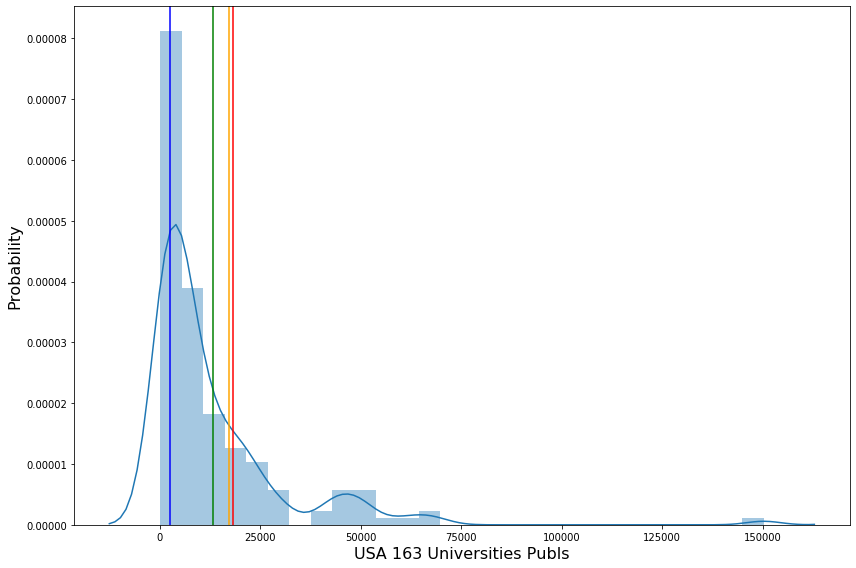

In [427]:
import pandas as pd
fig, ax = plt.subplots(figsize=(12,8))
x = pd.Series(so_data_USA['Total'], name="USA Universities Publs") # 163 universities
ax = sns.distplot(x)

ax.set_xlabel("USA 163 Universities Publs",fontsize=16)
ax.set_ylabel("Probability",fontsize=16)
plt.axvline(18132, color='red') # this is where U of R
plt.axvline(np.mean(so_data_USA['Total']), color='green') # this is the mean, 175882.56
plt.axvline(np.percentile(so_data_USA['Total'], 25.0), color='blue') # Q1
plt.axvline(np.percentile(so_data_USA['Total'], 75.0), color='orange') # Q3 very close to the mean, which means it is highly skewed
#plt.legend()
plt.tight_layout()

In [354]:
so_data_USA=so_data_USA.reset_index()

In [355]:
URpp=so_data_USA[so_data_USA.institution_name=='University of Rochester']
URpp

,institution_name,2014,2015,2016,2017,2018
162,University of Rochester,3602,3540,3515,3633,3842


In [356]:
URpp=URpp.set_index('institution_name')

In [368]:
URpp.agg('sum')

2014    3602
2015    3540
2016    3515
2017    3633
2018    3842
dtype: int64

In [340]:
inputdata=pd.DataFrame(data.iloc[:,:6], columns=['2014','2015','2016','2017','2018'])

In [341]:
inputdata.head()

,2014,2015,2016,2017,2018
institution_name,,,,,
University of Rochester,3602,3540,3515,3633,3842


In [342]:
inputdata.reset_index(drop=True, inplace=True)

In [214]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

inst_country=[]
inst_cc=[]
inst_id=[]
inst_link=[]
inst_name=[]
metricType=[]
threshold=[]
t1_value2014=[]
t1_value2015=[]
t1_value2016=[]
t1_value2017=[]
t1_value2018=[]
t1_percentage2014=[]
t1_percentage2015=[]
t1_percentage2016=[]
t1_percentage2017=[]
t1_percentage2018=[]
t5_value2014=[]
t5_value2015=[]
t5_value2016=[]
t5_value2017=[]
t5_value2018=[]
t5_percentage2014=[]
t5_percentage2015=[]
t5_percentage2016=[]
t5_percentage2017=[]
t5_percentage2018=[]
t10_value2014=[]
t10_value2015=[]
t10_value2016=[]
t10_value2017=[]
t10_value2018=[]
t10_percentage2014=[]
t10_percentage2015=[]
t10_percentage2016=[]
t10_percentage2017=[]
t10_percentage2018=[]
t25_value2014=[]
t25_value2015=[]
t25_value2016=[]
t25_value2017=[]
t25_value2018=[]
t25_percentage2014=[]
t25_percentage2015=[]
t25_percentage2016=[]
t25_percentage2017=[]
t25_percentage2018=[]



for line in data['University id'][50:75]:
    url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=PublicationsInTopJournalPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'
 #   print(url.format(line))
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "d3794058e2b24417b5dfd0ef8990e2dc"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
    if 'results' in result:
        if len(result['results'])>=1:
            if 'institution' in result['results'][0]:
#                if 'country' in result['results'][0]['institution']:
                inst_country.append(result['results'][0]['institution']['country'])
#            if 'countryCode' in result['results'][0]['institution']:
                inst_cc.append(result['results'][0]['institution']['countryCode'])
#            if 'id' in result['results'][0]['institution']:
                inst_id.append(result['results'][0]['institution']['id'])
#            if 'link' in result['results'][0]['institution']:
                inst_link.append(result['results'][0]['institution']['link'])
#            if 'name' in result['results'][0]['institution']:
                inst_name.append(result['results'][0]['institution']['name'])
            if 'metrics' in result['results'][0]:
#            if len(result['results'][0]['metrics'])>=1:
                if 'metricType' in result['results'][0]['metrics'][0]:
                    metricType.append(result['results'][0]['metrics'][0]['metricType'])
                if 'values' in result['results'][0]['metrics'][0]:
#                    print(result['results'][0]['metrics'][0]['values'][1]['threshold'])
                    for i in range(0, len(result['results'][0]['metrics'][0]['values'])):
                        threshold.append(result['results'][0]['metrics'][0]['values'][i]['threshold'])
                        if 'valueByYear' in result['results'][0]['metrics'][0]['values'][i]:
#                        if i ==0:
                            if '2014' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                                t1_value2014.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                                t1_value2015.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                                t1_value2016.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                                t1_value2017.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][0]['valueByYear']:
                                t1_value2018.append(result['results'][0]['metrics'][0]['values'][0]['valueByYear']['2018'])
#                        if i ==1:
                            if '2014' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_value2014.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_value2015.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_value2016.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_value2017.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_value2018.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2018'])
                                
#                        if i ==2:
                            if '2014' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                                t10_value2014.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                                t10_value2015.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                                t10_value2016.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                                t10_value2017.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][2]['valueByYear']:
                                t10_value2018.append(result['results'][0]['metrics'][0]['values'][2]['valueByYear']['2018'])
                                
#                        if i ==3:
                            if '2014' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                                t25_value2014.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                                t25_value2015.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                                t25_value2016.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                                t25_value2017.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][3]['valueByYear']:
                                t25_value2018.append(result['results'][0]['metrics'][0]['values'][3]['valueByYear']['2018'])
                                
                        if 'percentageByYear' in result['results'][0]['metrics'][0]['values'][i]:
#                        if i ==0:
                            if '2014' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                                t1_percentage2014.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                                t1_percentage2015.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                                t1_percentage2016.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                                t1_percentage2017.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][0]['percentageByYear']:
                                t1_percentage2018.append(result['results'][0]['metrics'][0]['values'][0]['percentageByYear']['2018'])
                                
#                        if i ==1:
                            if '2014' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_percentage2014.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_percentage2015.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_percentage2016.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_percentage2017.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][1]['valueByYear']:
                                t5_percentage2018.append(result['results'][0]['metrics'][0]['values'][1]['valueByYear']['2018'])
                                
#                        if i ==2:                                
                            if '2014' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                                t10_percentage2014.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                                t10_percentage2015.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                                t10_percentage2016.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                                t10_percentage2017.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][2]['percentageByYear']:
                                t10_percentage2018.append(result['results'][0]['metrics'][0]['values'][2]['percentageByYear']['2018'])
                                
#                        if i ==3:                                
                            if '2014' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                                t25_percentage2014.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2014'])
                            if '2015' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                                t25_percentage2015.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2015'])
                            if '2016' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                                t25_percentage2016.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2016'])
                            if '2017' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                                t25_percentage2017.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2017'])
                            if '2018' in result['results'][0]['metrics'][0]['values'][3]['percentageByYear']:
                                t25_percentage2018.append(result['results'][0]['metrics'][0]['values'][3]['percentageByYear']['2018'])
#                    else:
#                        t1_value2014.append('')
#                        t1_value2015.append('')
#                        t1_value2016.append('')
#                        t1_value2017.append('')
#                        t1_value2018.append('')
#                        t1_percentage2014.append('')
#                        t1_percentage2015.append('')
#                        t1_percentage2016.append('')
#                        t1_percentage2017.append('')
#                        t1_percentage2018.append('')

#                    else:
#                        t1_value2014.append('')
#                        t1_value2015.append('')
#                        t1_value2016.append('')
#                        t1_value2017.append('')
#                        t1_value2018.append('')
#                        t1_percentage2014.append('')
#                        t1_percentage2015.append('')
#                        t1_percentage2016.append('')
#                        t1_percentage2017.append('')
#                        t1_percentage2018.append('')

#                    if 'threshold' in result['results'][0]['metrics'][0]['values']:
#                        threshold.append(result['results'][0]['metrics'][0]['values'][0]['threshold'])


s1=pd.Series(inst_country, name='country')
s2=pd.Series(inst_cc, name='countryCode')
s3=pd.Series(inst_id, name='institution_id')
s4=pd.Series(inst_link, name='link')
s5=pd.Series(inst_name, name='institution_name')
s6=pd.Series(metricType, name='metricType')
s7=pd.Series(threshold, name='threshold')
s8=pd.Series(t1_value2014, name='t1_2014')
s9=pd.Series(t1_value2015, name='t1_2015')
s10=pd.Series(t1_value2016, name='t1_2016')
s11=pd.Series(t1_value2017, name='t1_2017')
s12=pd.Series(t1_value2018, name='t1_2018')
s13=pd.Series(t1_percentage2014, name='t1_percent2014')
s14=pd.Series(t1_percentage2015, name='t1_percent2015')
s15=pd.Series(t1_percentage2016, name='t1_percent2016')
s16=pd.Series(t1_percentage2017, name='t1_percent2017')
s17=pd.Series(t1_percentage2018, name='t1_percent2018')
s18=pd.Series(t5_value2014, name='t5_2014')
s19=pd.Series(t5_value2015, name='t5_2015')
s20=pd.Series(t5_value2016, name='t5_2016')
s21=pd.Series(t5_value2017, name='t5_2017')
s22=pd.Series(t5_value2018, name='t5_2018')
s23=pd.Series(t5_percentage2014, name='t5_percent2014')
s24=pd.Series(t5_percentage2015, name='t5_percent2015')
s25=pd.Series(t5_percentage2016, name='t5_percent2016')
s26=pd.Series(t5_percentage2017, name='t5_percent2017')
s27=pd.Series(t5_percentage2018, name='t5_percent2018')
s28=pd.Series(t10_value2014, name='t10_2014')
s29=pd.Series(t10_value2015, name='t10_2015')
s30=pd.Series(t10_value2016, name='t10_2016')
s31=pd.Series(t10_value2017, name='t10_2017')
s32=pd.Series(t10_value2018, name='t10_2018')
s33=pd.Series(t10_percentage2014, name='t10_percent2014')
s34=pd.Series(t10_percentage2015, name='t10_percent2015')
s35=pd.Series(t10_percentage2016, name='t10_percent2016')
s36=pd.Series(t10_percentage2017, name='t10_percent2017')
s37=pd.Series(t10_percentage2018, name='t10_percent2018')
s38=pd.Series(t25_value2014, name='t25_2014')
s39=pd.Series(t25_value2015, name='t25_2015')
s40=pd.Series(t25_value2016, name='t25_2016')
s41=pd.Series(t25_value2017, name='t25_2017')
s42=pd.Series(t25_value2018, name='t25_2018')
s43=pd.Series(t25_percentage2014, name='t25_percent2014')
s44=pd.Series(t25_percentage2015, name='t25_percent2015')
s45=pd.Series(t25_percentage2016, name='t25_percent2016')
s46=pd.Series(t25_percentage2017, name='t25_percent2017')
s47=pd.Series(t25_percentage2018, name='t25_percent2018')


DF=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16, s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,
             s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40, s41,s42,s43,s44,s45,s46,s47], axis=1)


DF.to_csv("THE_UNI_PublicationsInTopJournalPercentiles_ALL_3.csv", index=False)  # OK



#print(threshold)

In [103]:
for line in data['University id'][:2]:
    url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=ScholarlyOutput&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'
 #   print(url.format(line))
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    with open("THE_UNI_ID_METRIC_ALL.json", 'w') as jsonfile:
#        json.dump(resp.json(), jsonfile)
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
print(result['results'])

[{'institution': {'country': 'United States', 'countryCode': 'USA', 'id': 508092, 'link': {'@href': 'https://api.elsevier.com/analytics/scival/institution/508092?apiKey=a464321ef5063d696ada17f8c159a44c&httpAccept=application/json', '@ref': 'self', '@type': 'application/json'}, 'name': 'Jet Propulsion Laboratory, California Institute of Technology', 'uri': 'Institution/508092'}, 'metrics': [{'metricType': 'ScholarlyOutput', 'valueByYear': {'2014': 1913, '2015': 1800, '2016': 2181, '2017': 2052, '2018': 2200}}]}]


In [66]:
with open("THE_UNI_ID_METRIC_TEST.json") as outputfile:
    out=json.load(outputfile)

In [67]:
out

{'link': {'@ref': 'self',
  '@href': 'https://api.elsevier.com/analytics/scival/institution/metrics?journalImpactType=CiteScore&metricTypes=ScholarlyOutput&showAsFieldWeighted=false&apiKey=7afa707af961eb072a0133ceddcbc6f9&includeSelfCitations=false&yearRange=5yrs&httpAccept=application/json&byYear=true&institutionIds=508092&includedDocs=AllPublicationTypes',
  '@type': 'application/json'},
 'dataSource': {'sourceName': 'Scopus', 'lastUpdated': '2020-01-01'},
 'results': [{'metrics': [{'metricType': 'ScholarlyOutput',
     'valueByYear': {'2014': 1913,
      '2015': 1800,
      '2016': 2181,
      '2017': 2052,
      '2018': 2200}}],
   'institution': {'link': {'@ref': 'self',
     '@href': 'https://api.elsevier.com/analytics/scival/institution/508092?apiKey=7afa707af961eb072a0133ceddcbc6f9&httpAccept=application/json',
     '@type': 'application/json'},
    'name': 'Jet Propulsion Laboratory, California Institute of Technology',
    'id': 508092,
    'uri': 'Institution/508092',
    'c

In [86]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

for line in want_3[:4]:
#    query = "name(school)"
    url= """https://api.elsevier.com/metrics/institution/search?query=name({})&start=0&count=2&limit=10&cursor=*"""
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
#    data.update(a_dict)
    result=json.loads(parsed)
#    data=parsed[1]
#    print(result)
    data=result['results']
    print(data)
#    if (data[0]['country'] is not None):

[{'country': 'United Kingdom', 'countryCode': 'GBR', 'id': 315091, 'link': {'@href': 'https://api.elsevier.com/analytics/scival/institution/315091?apiKey=dcfb521197bf15867d12c3c86c46c69b&httpAccept=application/json', '@ref': 'self', '@type': 'application/json'}, 'name': 'University of Oxford', 'uri': 'Institution/315091'}]
[{'country': 'United States', 'countryCode': 'USA', 'id': 508092, 'link': {'@href': 'https://api.elsevier.com/analytics/scival/institution/508092?apiKey=dcfb521197bf15867d12c3c86c46c69b&httpAccept=application/json', '@ref': 'self', '@type': 'application/json'}, 'name': 'Jet Propulsion Laboratory, California Institute of Technology', 'uri': 'Institution/508092'}, {'country': 'United States', 'countryCode': 'USA', 'id': 508021, 'link': {'@href': 'https://api.elsevier.com/analytics/scival/institution/508021?apiKey=dcfb521197bf15867d12c3c86c46c69b&httpAccept=application/json', '@ref': 'self', '@type': 'application/json'}, 'name': 'California Institute of Technology', 'ur

In [3]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane"

C:\Users\jchen148\THE Rankings\Report to Jane


In [97]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(0.1)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

for line in want_3[:10]:
#    query = "name(school)"
    url= "https://api.elsevier.com/metrics/institution/search?query=name({})&start=0&count=25&limit=25&cursor=*"
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
    result=json.loads(parsed)
    data=result['results']
    for i in data:
        if i is not None:
#    if data[0] is not None:        
            countries=i['country']
            unames=i['name']
            uids=i['id']
            codes=i['countryCode'] 
            if (countries is not None):
                country.append(countries)
            else:
                country.append("")
            if (unames is not None):
                university_name.append(unames)
            else:
                university_name.append("")
            if (uids is not None):
                university_id.append(uids)
            else:
                university_id.append("")
            if (codes is not None):
                countryCode.append(codes)
            else:
                countryCode.append("")
            df=pd.DataFrame({'University Name':university_name, 'University id':university_id, 'Country':country, 'Country Code':countryCode})
            df.to_csv("THE_CountryCode_Result_1202.csv")
    
    

In [98]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(0.1)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

for line in want_3[10:20]:
#    query = "name(school)"
    url= "https://api.elsevier.com/metrics/institution/search?query=name({})&start=0&count=25&limit=25&cursor=*"
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
    result=json.loads(parsed)
    data=result['results']
    for i in data:
        if i is not None:
#    if data[0] is not None:        
            countries=i['country']
            unames=i['name']
            uids=i['id']
            codes=i['countryCode'] 
            if (countries is not None):
                country.append(countries)
            else:
                country.append("")
            if (unames is not None):
                university_name.append(unames)
            else:
                university_name.append("")
            if (uids is not None):
                university_id.append(uids)
            else:
                university_id.append("")
            if (codes is not None):
                countryCode.append(codes)
            else:
                countryCode.append("")
            df=pd.DataFrame({'University Name':university_name, 'University id':university_id, 'Country':country, 'Country Code':countryCode})
            df.to_csv("THE_CountryCode_Result_1202_2.csv")
    

In [100]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(0.1)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

for line in want_3[20:30]:
#    query = "name(school)"
    url= "https://api.elsevier.com/metrics/institution/search?query=name({})&start=0&count=25&limit=25&cursor=*"
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
    result=json.loads(parsed)
    data=result['results']
    for i in data:
        if i is not None:
#    if data[0] is not None:        
            countries=i['country']
            unames=i['name']
            uids=i['id']
            codes=i['countryCode'] 
            if (countries is not None):
                country.append(countries)
            else:
                country.append("")
            if (unames is not None):
                university_name.append(unames)
            else:
                university_name.append("")
            if (uids is not None):
                university_id.append(uids)
            else:
                university_id.append("")
            if (codes is not None):
                countryCode.append(codes)
            else:
                countryCode.append("")
            df=pd.DataFrame({'University Name':university_name, 'University id':university_id, 'Country':country, 'Country Code':countryCode})
            df.to_csv("THE_CountryCode_Result_1202_3.csv")
    

In [ ]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(0.1)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

for line in want_3[20:30]:
#    query = "name(school)"
    url= "https://api.elsevier.com/metrics/institution/search?query=name({})&start=0&count=25&limit=25&cursor=*"
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
    result=json.loads(parsed)
    data=result['results']
    for i in data:
        if i is not None:
#    if data[0] is not None:        
            countries=i['country']
            unames=i['name']
            uids=i['id']
            codes=i['countryCode'] 
            if (countries is not None):
                country.append(countries)
            else:
                country.append("")
            if (unames is not None):
                university_name.append(unames)
            else:
                university_name.append("")
            if (uids is not None):
                university_id.append(uids)
            else:
                university_id.append("")
            if (codes is not None):
                countryCode.append(codes)
            else:
                countryCode.append("")
            df=pd.DataFrame({'University Name':university_name, 'University id':university_id, 'Country':country, 'Country Code':countryCode})
            df.to_csv("THE_CountryCode_Result_1202_3.csv")

In [ ]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(0.1)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

for line in want_3[30:40]:
#    query = "name(school)"
    url= "https://api.elsevier.com/metrics/institution/search?query=name({})&start=0&count=25&limit=25&cursor=*"
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
    result=json.loads(parsed)
    data=result['results']

In [151]:
pwd

'C:\\Users\\jchen148\\THE Rankings\\Report to Jane'

In [169]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(3)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

for line in want_3[75:]:
    line=re.sub('[^A-Za-z0-9]+',' ', line)
#    query = "name(school)"
    url= "https://api.elsevier.com/metrics/institution/search?query=name({})&start=0&count=25&limit=25&cursor=*"
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
#    try:
    parsed=json.dumps(resp.json(),
                       sort_keys=True,
                       indent=4, separators=(',', ': '))
    result=json.loads(parsed)
    data=result['results']
#    except ValueError:
#           pass
#            result=json.loads(parsed)
#            data=result['results']
    for i in data:
        if i is None:
            pass
        else:
#                    try:
#    if data[0] is not None:        
            countries=i['country']
            unames=i['name']
            uids=i['id']
            codes=i['countryCode'] 
            if (countries is not None):
                country.append(countries)
            else:
                country.append("")
            if (unames is not None):
                university_name.append(unames)
            else:
                university_name.append("")
            if (uids is not None):
                university_id.append(uids)
            else:
                university_id.append("")
            if (codes is not None):
                countryCode.append(codes)
            else:
                countryCode.append("")
#                    except (RuntimeError, TypeError, NameError,JSONDecodeError):
#                            pass
            df=pd.DataFrame({'University Name':university_name, 'University id':university_id, 'Country':country, 'Country Code':countryCode})
            df.to_csv("THE_CountryCode_Result_1202_12.csv")
#    except ValueError:
#        continue

In [153]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(3)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

for line in want_3[47:50]:
#    query = "name(school)"
    url= "https://api.elsevier.com/metrics/institution/search?query=name({})&start=0&count=25&limit=25&cursor=*"
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    try:
        parsed=json.dumps(resp.json(),
                       sort_keys=True,
                       indent=4, separators=(',', ': '))
        result=json.loads(parsed)
        data=result['results']
        for i in data:
            if i is None:
                pass
            else:
                try:
#    if data[0] is not None:        
                    countries=i['country']
                    unames=i['name']
                    uids=i['id']
                    codes=i['countryCode'] 
                    if (countries is not None):
                        country.append(countries)
                    else:
                        country.append("")
                    if (unames is not None):
                        university_name.append(unames)
                    else:
                        university_name.append("")
                    if (uids is not None):
                        university_id.append(uids)
                    else:
                        university_id.append("")
                    if (codes is not None):
                        countryCode.append(codes)
                    else:
                        countryCode.append("")
                except (RuntimeError, TypeError, NameError,JSONDecodeError):
                        pass
                        df=pd.DataFrame({'University Name':university_name, 'University id':university_id, 'Country':country, 'Country Code':countryCode})
                        df.to_csv("THE_CountryCode_Result_1202_8.csv")
    except ValueError:
        continue
    

In [1]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane"

C:\Users\jchen148\THE Rankings\Report to Jane


In [126]:
for line in want_3[38:40]:
    print(re.sub('[^A-Za-z0-9]+',' ', line))

North Carolina at Chapel Hill
Wageningen University Research


In [ ]:
for line in want_3[38:40]:
    line=re.sub('[^A-Za-z0-9]+',' ', line)
#    query = "name(school)"
    url= """https://api.elsevier.com/metrics/institution/search?query=name("{}")&start=0&count=25&limit=25&cursor=*"""
#    resp = requests.get(url.format(line), headers={'Accept':'application/json',
#                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})

In [135]:
pwd

'C:\\Users\\jchen148\\THE Rankings\\Report to Jane'

In [137]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(3)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

for line in want_3[40:50]:
#    line=re.sub('[^A-Za-z0-9]+',' ', line)
#    query = "name(school)"
    url= """https://api.elsevier.com/metrics/institution/search?query=name("{}")&start=0&count=25&limit=25&cursor=*"""
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
    result=json.loads(parsed)
    data=result['results']
    for i in data:
        if i is not None:
#    if data[0] is not None:        
            countries=i['country']
            unames=i['name']
            uids=i['id']
            codes=i['countryCode'] 
            if (countries is not None):
                country.append(countries)
            else:
                country.append("")
            if (unames is not None):
                university_name.append(unames)
            else:
                university_name.append("")
            if (uids is not None):
                university_id.append(uids)
            else:
                university_id.append("")
            if (codes is not None):
                countryCode.append(codes)
            else:
                countryCode.append("")
            df=pd.DataFrame({'University Name':university_name, 'University id':university_id, 'Country':country, 'Country Code':countryCode})
            df.to_csv("THE_CountryCode_Result_1202_6.csv")
            
            

In [117]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(3)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

#for line in want_3[40:50]:
#    line=re.sub('[^A-Za-z0-9]+',' ', line)
#    query = "name(school)"
#name="University of Rochester"
url= """https://api.elsevier.com/metrics/institution/search?query=name(University%20of%20Rochester)&start=0&count=25&limit=25&cursor=*"""
resp = requests.get(url, headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
result=json.loads(parsed)
data=result['results']
#print(data)
for i in data:
    if i is not None:
#    if data[0] is not None:        
        countries=i['country']
        unames=i['name']
        uids=i['id']
        codes=i['countryCode'] 
        if (countries is not None):
            country.append(countries)
        else:
            country.append("")
        if (unames is not None):
            university_name.append(unames)
        else:
            university_name.append("")
        if (uids is not None):
            university_id.append(uids)
        else:
            university_id.append("")
        if (codes is not None):
            countryCode.append(codes)
        else:
            countryCode.append("")
        df=pd.DataFrame({'University Name':university_name, 'University id':university_id, 'Country':country, 'Country Code':countryCode})
        df.to_csv("THE_CountryCode_Result_1202_13.csv")

In [110]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(3)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

#for line in want_3[40:50]:
#    line=re.sub('[^A-Za-z0-9]+',' ', line)
#    query = "name(school)"
name="University of Rochester"
url= """https://api.elsevier.com/metrics/institution/search?query=name("{}")&start=0&count=25&limit=25&cursor=*"""
resp = requests.get(url.format(name), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
result=json.loads(parsed)
data=result['results']
for i in data:
    if i is not None:
#    if data[0] is not None:        
        countries=i['country']
        unames=i['name']
        uids=i['id']
        codes=i['countryCode'] 
        if (countries is not None):
            country.append(countries)
        else:
            country.append("")
        if (unames is not None):
            university_name.append(unames)
        else:
            university_name.append("")
        if (uids is not None):
            university_id.append(uids)
        else:
            university_id.append("")
        if (codes is not None):
            countryCode.append(codes)
        else:
            countryCode.append("")
        df=pd.DataFrame({'University Name':university_name, 'University id':university_id, 'Country':country, 'Country Code':countryCode})
        df.to_csv("THE_CountryCode_Result_1202_13.csv")
            
            

In [ ]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

university_name=[]
university_id=[]
country=[]
countryCode=[]

for line in want_3:
#    query = "name(school)"
    url= "https://api.elsevier.com/metrics/institution/search?name({})&start=0&count=2&limit=10&cursor=*"
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)

In [11]:
cd "C:\Users\jchen148\THE Rankings\Report to Jane"

C:\Users\jchen148\THE Rankings\Report to Jane


In [39]:
pd.read_csv(r"C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_1.csv")

,Unnamed: 0,University Name,University id,Country,Country Code
0,0,University of Oxford,315091,United Kingdom,GBR
1,1,"Jet Propulsion Laboratory, California Institut...",508092,United States,USA
2,2,California Institute of Technology,508021,United States,USA
3,3,University of Cambridge,315068,United Kingdom,GBR
4,4,Stanford University,508219,United States,USA
5,5,Massachusetts Institute of Technology,508111,United States,USA
6,6,Princeton University,508191,United States,USA
7,7,Harvard University,508076,United States,USA
8,8,Yale University,508383,United States,USA
9,9,University of Chicago,508270,United States,USA


# concatenate all files

In [22]:
link =r"C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_{}.csv"

for i in range(0, 12):
    i+=1
    print(link.format(i))

C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_1.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_2.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_3.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_4.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_5.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_6.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_7.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_8.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_9.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_10.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_11.csv
C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_12.csv


In [71]:
for i in range(0, 12):
    i+=1
    name='data{}'
    print(name.format(i))

data1
data2
data3
data4
data5
data6
data7
data8
data9
data10
data11
data12


In [5]:
import pandas as pd

In [118]:
filename='THE_CountryCode_Result_1202_{}.csv'
for i in range(0, 13):
    i+=1
    print(filename.format(i))

THE_CountryCode_Result_1202_1.csv
THE_CountryCode_Result_1202_2.csv
THE_CountryCode_Result_1202_3.csv
THE_CountryCode_Result_1202_4.csv
THE_CountryCode_Result_1202_5.csv
THE_CountryCode_Result_1202_6.csv
THE_CountryCode_Result_1202_7.csv
THE_CountryCode_Result_1202_8.csv
THE_CountryCode_Result_1202_9.csv
THE_CountryCode_Result_1202_10.csv
THE_CountryCode_Result_1202_11.csv
THE_CountryCode_Result_1202_12.csv
THE_CountryCode_Result_1202_13.csv


In [4]:
chucks=[]

filename='THE_CountryCode_Result_1202_{}.csv'
for i in range(0, 13):
    i+=1
    print(filename.format(i))
#    chucks.append(filename.format(i))

THE_CountryCode_Result_1202_1.csv
THE_CountryCode_Result_1202_2.csv
THE_CountryCode_Result_1202_3.csv
THE_CountryCode_Result_1202_4.csv
THE_CountryCode_Result_1202_5.csv
THE_CountryCode_Result_1202_6.csv
THE_CountryCode_Result_1202_7.csv
THE_CountryCode_Result_1202_8.csv
THE_CountryCode_Result_1202_9.csv
THE_CountryCode_Result_1202_10.csv
THE_CountryCode_Result_1202_11.csv
THE_CountryCode_Result_1202_12.csv
THE_CountryCode_Result_1202_13.csv


In [5]:
import pandas as pd

filename='THE_CountryCode_Result_1202_{}.csv'

chucks=[]
for i in range(0, 13):
    i+=1
    chucks.append(pd.read_csv(filename.format(i)))
    
namedata=pd.concat(chucks, ignore_index=True)

namedata.head()

,Unnamed: 0,University Name,University id,Country,Country Code
0,0,University of Oxford,315091,United Kingdom,GBR
1,1,"Jet Propulsion Laboratory, California Institut...",508092,United States,USA
2,2,California Institute of Technology,508021,United States,USA
3,3,University of Cambridge,315068,United Kingdom,GBR
4,4,Stanford University,508219,United States,USA


In [6]:
namedata.reset_index()

namedata2=namedata[:]

namedata2.head()

namedata2=namedata.iloc[:,1:] # delete the first column

namedata2.head()



,University Name,University id,Country,Country Code
0,University of Oxford,315091,United Kingdom,GBR
1,"Jet Propulsion Laboratory, California Institut...",508092,United States,USA
2,California Institute of Technology,508021,United States,USA
3,University of Cambridge,315068,United Kingdom,GBR
4,Stanford University,508219,United States,USA


In [137]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(3)

university_name=[]
university_id=[]
country=[]
countryCode=[]
df=pd.DataFrame()

for line in want_3[40:50]:
#    line=re.sub('[^A-Za-z0-9]+',' ', line)
#    query = "name(school)"
    url= """https://api.elsevier.com/metrics/institution/search?query=name("{}")&start=0&count=25&limit=25&cursor=*"""
    resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
    result=json.loads(parsed)
    data=result['results']
    for i in data:
        if i is not None:
#    if data[0] is not None:        
            countries=i['country']
            unames=i['name']
            uids=i['id']
            codes=i['countryCode'] 
            if (countries is not None):
                country.append(countries)
            else:
                country.append("")
            if (unames is not None):
                university_name.append(unames)
            else:
                university_name.append("")
            if (uids is not None):
                university_id.append(uids)
            else:
                university_id.append("")
            if (codes is not None):
                countryCode.append(codes)
            else:
                countryCode.append("")
            df=pd.DataFrame({'University Name':university_name, 'University id':university_id, 'Country':country, 'Country Code':countryCode})
            df.to_csv("THE_CountryCode_Result_1202_6.csv")
            
            

In [7]:
Uidlist=namedata2['University id']
Uidlist.head()

0    315091
1    508092
2    508021
3    315068
4    508219
Name: University id, dtype: int64

In [8]:
import requests
import requests_oauthlib
import pandas as pd
import numpy as np

In [ ]:
import time
time.sleep(2)


url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount&CitationsPerPublication&CollaborationImpact&CitedPublications&FieldWeightedCitationImpact&ScholarlyOutput&PublicationsInTopJournalPercentiles&OutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'


resp = requests.get(url.format(line), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
result=json.loads(parsed)





In [9]:
len(Uidlist)

1272

In [125]:
import requests
import requests_oauthlib
import json
import pandas as pd
import numpy as np

import time
time.sleep(2)

country=[]
countryCode=[]
Uid=[]
uname=[]
uri=[]
metric=[]
CitationCount2014=[]
CitationCount2015=[]
CitationCount2016=[]
CitationCount2017=[]
CitationCount2018=[]

url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount&CitationsPerPublication&CollaborationImpact&CitedPublications&FieldWeightedCitationImpact&ScholarlyOutput&PublicationsInTopJournalPercentiles&OutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'

for uid in Uidlist[1270:]:
#    print(url.format(uid))
    resp = requests.get(url.format(uid), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
    result=json.loads(parsed)
#    print(result)
    if 'results' not in result:
        pass
    else:
        if list(result['results']) is None:
            pass
        else:
#        if list(result['results'])[0] is None:
#            pass
#        else:
#        data=result['results']
            if len(list(result['results']))<1:
               pass
            else:
                if 'institution' not in list(result['results'])[0]:
                    pass
                else:
                    if 'country' in result['results'][0]['institution']:
                        country.append(result['results'][0]['institution']['country'])
                    else:
                        country.append("")
                    if 'countryCode' in result['results'][0]['institution']:
                        countryCode.append(result['results'][0]['institution']['countryCode'])
                    else:
                        countryCode.append("")
                    if 'id' in result['results'][0]['institution']:
                        Uid.append(result['results'][0]['institution']['id'])
                    else:
                        Uid.append("")
                    if 'name' in result['results'][0]['institution']:
                        uname.append(result['results'][0]['institution']['name'])
                    else:
                        uname.append("")
                    if 'uri' in result['results'][0]:
                        uri.append(result['results'][0]['institution']['uri'])
                    else:
                        uri.append("")
                if 'metrics' not in result['results'][0]:
                    pass
                else:
                    if 'metricType' not in result['results'][0]['metrics'][0]:
                        pass
                    else:
                        metric.append(result['results'][0]['metrics'][0]['metricType'])
                        if 'valueByYear' in result['results'][0]['metrics'][0]:
                            if '2014' in result['results'][0]['metrics'][0]['valueByYear']:
                                CitationCount2014.append(result['results'][0]['metrics'][0]['valueByYear']['2014'])
                            else:
                                CitationCount2014.append("")
                            if '2015' in result['results'][0]['metrics'][0]['valueByYear']:
                                CitationCount2015.append(result['results'][0]['metrics'][0]['valueByYear']['2015'])
                            else:
                                CitationCount2015.append("")
                            if '2016' in result['results'][0]['metrics'][0]['valueByYear']:
                                CitationCount2016.append(result['results'][0]['metrics'][0]['valueByYear']['2016'])
                            else:
                                CitationCount2016.append("")
                            if '2017' in result['results'][0]['metrics'][0]['valueByYear']:
                                CitationCount2017.append(result['results'][0]['metrics'][0]['valueByYear']['2017'])
                            else:
                                CitationCount2017.append("")
                            if '2018' in result['results'][0]['metrics'][0]['valueByYear']:
                                CitationCount2018.append(result['results'][0]['metrics'][0]['valueByYear']['2018'])
                            else:
                                CitationCount2018.append("")
                        else:
                            CitationCount2014.append("")
                            CitationCount2015.append("")
                            CitationCount2016.append("")
                            CitationCount2017.append("")
                            CitationCount2018.append("")
#            else:
#                metric.append("")
 
s1=pd.Series(country, name='Country')
s2=pd.Series(countryCode, name='CountryCode')
s3=pd.Series(Uid, name='Uid')
s4=pd.Series(uname, name='UniversityName')
s5=pd.Series(uri, name='uri')
s6=pd.Series(metric, name='metric')
s7=pd.Series(CitationCount2014, name='Citation2014')
s8=pd.Series(CitationCount2015, name='Citation2015')
s9=pd.Series(CitationCount2016, name='Citation2016')
s10=pd.Series(CitationCount2017, name='Citation2017')
s11=pd.Series(CitationCount2018, name='Citation2018')
    
Times_df=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11], axis=1)
Times_df.to_csv("Times_11.csv",index=False)        
#    df=pd.DataFrame(pd.DataFrame(result['results'][0]['metrics']))
#    df.to_csv("1213_THE.csv", index=False)




# Save data dictionary

In [38]:
import requests
import requests_oauthlib
import json
import pandas as pd
import numpy as np

import time
time.sleep(2)

url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount&CitationsPerPublication&CollaborationImpact&CitedPublications&FieldWeightedCitationImpact&ScholarlyOutput&PublicationsInTopJournalPercentiles&OutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'

for uid in Uidlist[:5]:
#    print(url.format(uid))
    resp = requests.get(url.format(uid), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
#    parsed=json.dumps(resp.json(),
#                 sort_keys=True,
#                 indent=4, separators=(',', ': '))
#    print(parsed)
    #result=json.loads(parsed)
with open("Uni_Metric_Data_Dictionary_Test4.json", 'w') as jsonfile:
    json.dump(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '), fp=jsonfile)

In [ ]:
import requests
import requests_oauthlib
import json
import pandas as pd
import numpy as np

import time
time.sleep(2)

url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount&CitationsPerPublication&CollaborationImpact&CitedPublications&FieldWeightedCitationImpact&ScholarlyOutput&PublicationsInTopJournalPercentiles&OutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'

for uid in Uidlist[:2]:
#    print(url.format(uid))
    resp = requests.get(url.format(uid), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
#    parsed = json.loads(resp.text)
#    print(parsed)
    result=json.loads(parsed)

In [24]:
import requests
import requests_oauthlib
import json
import pandas as pd
import numpy as np

import time
time.sleep(2)

url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount&CitationsPerPublication&CollaborationImpact&CitedPublications&FieldWeightedCitationImpact&ScholarlyOutput&PublicationsInTopJournalPercentiles&OutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'

for uid in Uidlist[25:]:
#    print(url.format(uid))
    resp = requests.get(url.format(uid), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "dcfb521197bf15867d12c3c86c46c69b"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
    #result=json.loads(parsed)
with open("Uni_Metric_Data_Dic_2.json", 'w') as jsonfile:
    json.dump(parsed, jsonfile)

In [125]:
import requests
import requests_oauthlib
import json
import pandas as pd
import numpy as np

import time
time.sleep(2)

country=[]
countryCode=[]
Uid=[]
uname=[]
uri=[]
metric=[]
CitationCount2014=[]
CitationCount2015=[]
CitationCount2016=[]
CitationCount2017=[]
CitationCount2018=[]

url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount&CitationsPerPublication&CollaborationImpact&CitedPublications&FieldWeightedCitationImpact&ScholarlyOutput&PublicationsInTopJournalPercentiles&OutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'

for uid in Uidlist[1270:]:
#    print(url.format(uid))
    resp = requests.get(url.format(uid), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
    result=json.loads(parsed)
#    print(result)
    if 'results' not in result:
        pass
    else:
        if list(result['results']) is None:
            pass
        else:
#        if list(result['results'])[0] is None:
#            pass
#        else:
#        data=result['results']
            if len(list(result['results']))<1:
               pass
            else:
                if 'institution' not in list(result['results'])[0]:
                    pass
                else:
                    if 'country' in result['results'][0]['institution']:
                        country.append(result['results'][0]['institution']['country'])
                    else:
                        country.append("")
                    if 'countryCode' in result['results'][0]['institution']:
                        countryCode.append(result['results'][0]['institution']['countryCode'])
                    else:
                        countryCode.append("")
                    if 'id' in result['results'][0]['institution']:
                        Uid.append(result['results'][0]['institution']['id'])
                    else:
                        Uid.append("")
                    if 'name' in result['results'][0]['institution']:
                        uname.append(result['results'][0]['institution']['name'])
                    else:
                        uname.append("")
                    if 'uri' in result['results'][0]:
                        uri.append(result['results'][0]['institution']['uri'])
                    else:
                        uri.append("")
                if 'metrics' not in result['results'][0]:
                    pass
                else:
                    if 'metricType' not in result['results'][0]['metrics'][0]:
                        pass
                    else:
                        metric.append(result['results'][0]['metrics'][0]['metricType'])
                        if 'valueByYear' in result['results'][0]['metrics'][0]:
                            if '2014' in result['results'][0]['metrics'][0]['valueByYear']:
                                CitationCount2014.append(result['results'][0]['metrics'][0]['valueByYear']['2014'])
                            else:
                                CitationCount2014.append("")
                            if '2015' in result['results'][0]['metrics'][0]['valueByYear']:
                                CitationCount2015.append(result['results'][0]['metrics'][0]['valueByYear']['2015'])
                            else:
                                CitationCount2015.append("")
                            if '2016' in result['results'][0]['metrics'][0]['valueByYear']:
                                CitationCount2016.append(result['results'][0]['metrics'][0]['valueByYear']['2016'])
                            else:
                                CitationCount2016.append("")
                            if '2017' in result['results'][0]['metrics'][0]['valueByYear']:
                                CitationCount2017.append(result['results'][0]['metrics'][0]['valueByYear']['2017'])
                            else:
                                CitationCount2017.append("")
                            if '2018' in result['results'][0]['metrics'][0]['valueByYear']:
                                CitationCount2018.append(result['results'][0]['metrics'][0]['valueByYear']['2018'])
                            else:
                                CitationCount2018.append("")
                        else:
                            CitationCount2014.append("")
                            CitationCount2015.append("")
                            CitationCount2016.append("")
                            CitationCount2017.append("")
                            CitationCount2018.append("")
#            else:
#                metric.append("")
 
s1=pd.Series(country, name='Country')
s2=pd.Series(countryCode, name='CountryCode')
s3=pd.Series(Uid, name='Uid')
s4=pd.Series(uname, name='UniversityName')
s5=pd.Series(uri, name='uri')
s6=pd.Series(metric, name='metric')
s7=pd.Series(CitationCount2014, name='Citation2014')
s8=pd.Series(CitationCount2015, name='Citation2015')
s9=pd.Series(CitationCount2016, name='Citation2016')
s10=pd.Series(CitationCount2017, name='Citation2017')
s11=pd.Series(CitationCount2018, name='Citation2018')
    
Times_df=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11], axis=1)
Times_df.to_csv("Times_11.csv",index=False)        
#    df=pd.DataFrame(pd.DataFrame(result['results'][0]['metrics']))
#    df.to_csv("1213_THE.csv", index=False)




# Combine all subfiles

In [126]:
filename='Times_{}.csv'

for i in range(1,12):
    print(filename.format(i))

Times_1.csv
Times_2.csv
Times_3.csv
Times_4.csv
Times_5.csv
Times_6.csv
Times_7.csv
Times_8.csv
Times_9.csv
Times_10.csv
Times_11.csv


In [127]:
chuck=[]
for i in range(1,12):
    chuck.append(pd.read_csv(filename.format(i)))

total=pd.concat(chuck, ignore_index=True)    

total.head()

,Country,CountryCode,Uid,UniversityName,uri,metric,Citation2014,Citation2015,Citation2016,Citation2017,Citation2018
0,United Kingdom,GBR,315091,University of Oxford,NaN,CitationCount,355751.0,313129.0,238271.0,149907.0,75747.0
1,United States,USA,508092,"Jet Propulsion Laboratory, California Institut...",NaN,CitationCount,39797.0,30488.0,32933.0,18670.0,9264.0
2,United States,USA,508021,California Institute of Technology,NaN,CitationCount,129593.0,97259.0,90365.0,58679.0,29486.0
3,United Kingdom,GBR,315068,University of Cambridge,NaN,CitationCount,260407.0,236169.0,197754.0,127682.0,64830.0
4,United States,USA,508219,Stanford University,NaN,CitationCount,404346.0,363567.0,282005.0,194136.0,95069.0


In [128]:
del total['uri']

In [129]:
total.head()

total.to_csv("THE_Ranked_University_CitationCount_2014_2018.csv", index=False)

In [130]:
total.head()

,Country,CountryCode,Uid,UniversityName,metric,Citation2014,Citation2015,Citation2016,Citation2017,Citation2018
0,United Kingdom,GBR,315091,University of Oxford,CitationCount,355751.0,313129.0,238271.0,149907.0,75747.0
1,United States,USA,508092,"Jet Propulsion Laboratory, California Institut...",CitationCount,39797.0,30488.0,32933.0,18670.0,9264.0
2,United States,USA,508021,California Institute of Technology,CitationCount,129593.0,97259.0,90365.0,58679.0,29486.0
3,United Kingdom,GBR,315068,University of Cambridge,CitationCount,260407.0,236169.0,197754.0,127682.0,64830.0
4,United States,USA,508219,Stanford University,CitationCount,404346.0,363567.0,282005.0,194136.0,95069.0


In [132]:
ranked=total.sort_values(by='Citation2018', ascending=False)


ranked.to_csv("THE_Ranked_Universites_CitationCounts_2014_2018.csv", index=False)

In [135]:
ranked=ranked.drop_duplicates()
ranked.to_csv("Updated_THE_Ranked_Universites_CitationCounts_2014_2018.csv", index=False)

In [97]:
url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount&CitationsPerPublication&CollaborationImpact&CitedPublications&FieldWeightedCitationImpact&ScholarlyOutput&PublicationsInTopJournalPercentiles&OutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&showAsFieldWeighted=false'

for uid in Uidlist[:1]:
#    print(url.format(uid))
    resp = requests.get(url.format(uid), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
    result=json.loads(parsed)
    print(result['results'][0])

{'institution': {'country': 'United Kingdom', 'countryCode': 'GBR', 'id': 315091, 'link': {'@href': 'https://api.elsevier.com/analytics/scival/institution/315091?apiKey=a464321ef5063d696ada17f8c159a44c&httpAccept=application/json', '@ref': 'self', '@type': 'application/json'}, 'name': 'University of Oxford', 'uri': 'Institution/315091'}, 'metrics': [{'metricType': 'CitationCount', 'valueByYear': {'2014': 355751, '2015': 313129, '2016': 238271, '2017': 149907, '2018': 75747}}]}


In [4]:
link =r"C:\Users\jchen148\THE Rankings\Report to Jane\THE_CountryCode_Result_1202_{}.csv"

for i in range(0, 12):
    i+=1
#    print(link.format(i))
    name = 'data{}'
    want = name.format(i)
    want = pd.read_csv(link.format(i))
want


,Unnamed: 0,University Name,University id,Country,Country Code
0,0,The American University of Paris,703235,France,FRA
1,1,Vrije Universiteit Amsterdam,325016,Netherlands,NLD
2,2,Pompeu Fabra University,312052,Spain,ESP
3,3,Trinity College Dublin,319006,Ireland,IRL
4,4,University of Liverpool,315086,United Kingdom,GBR
5,5,Hong Kong Polytechnic University,205004,Hong Kong,HKG
6,6,University of Alabama at Birmingham,508253,United States,USA
7,7,University of East Anglia,315072,United Kingdom,GBR
8,8,University of Canberra,201024,Australia,AUS
9,9,Aalborg University,310001,Denmark,DNK


In [5]:
data=want.sort_values(by='Country Code')
data.head()

,Unnamed: 0,University Name,University id,Country,Country Code
291,291,American University of Afghanistan,715769,Afghanistan,AFG
189,189,United Arab Emirates University,401002,United Arab Emirates,ARE
285,285,American University of Ras Al Khaimah,709859,United Arab Emirates,ARE
1077,1077,Al Ain University of Science and Technology,700486,United Arab Emirates,ARE
1035,1035,Amity University,712406,United Arab Emirates,ARE


In [29]:
len(data) # 1144

1144

In [32]:
# want to get the CitationCount for top 300 universities

want.head(300)

len(want)

1144

In [59]:
test_data = want[:2]
test_data = test_data['University id']

test_data

df_id = pd.DataFrame({'uid':test_data})

df_id

,uid
0,703235
1,325016


In [60]:
for uid in df_id['uid']:
    print(uid)

703235
325016


In [62]:
df_id

,uid
0,703235
1,325016


In [167]:

url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount%2CCitedPublications%2CScholarlyOutput%2CPublicationsInTopJournalPercentiles%2COutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&start=0&count=25&limit=25&cursor=*'

for uid in df_id['uid']:
#    query = "name(school)"
#    url= "https://api.elsevier.com/metrics/institution/search?name({})&start=0&count=2&limit=25&cursor=*"

    resp = requests.get(url.format(uid), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
    result=json.loads(parsed)
#    result=parsed[2]
    data=result['results']
#    print(data[0])
    for i in data:
#        print(i['metrics'][2]) # ScholarlyOutput
#        print(i['metrics'][0]) # CitationCount
#        print(i['metrics'][1]) # CitedPublications
#        print(i['metrics'][3]['impactType'])# impactType
        print(i['metrics'][3]) # CiteScore and PublicationsInTopJournalPercentiles
#        print(i['metrics'][3]['values'])
#        print(i['metrics'][3]['values'][0]['percentageByYear'])
#        print(i['metrics'][3]['values'][0]['valueByYear'])

{'impactType': 'CiteScore', 'metricType': 'PublicationsInTopJournalPercentiles', 'values': [{'percentageByYear': {'2014': 0.0, '2015': 0.0, '2016': 0.0, '2017': 0.0, '2018': 0.0}, 'threshold': 1, 'valueByYear': {'2014': 0, '2015': 0, '2016': 0, '2017': 0, '2018': 0}}, {'percentageByYear': {'2014': 20.0, '2015': 9.523809, '2016': 0.0, '2017': 11.764706, '2018': 22.222223}, 'threshold': 5, 'valueByYear': {'2014': 3, '2015': 2, '2016': 0, '2017': 2, '2018': 4}}, {'percentageByYear': {'2014': 26.666668, '2015': 14.285715, '2016': 13.636364, '2017': 35.294117, '2018': 27.777779}, 'threshold': 10, 'valueByYear': {'2014': 4, '2015': 3, '2016': 3, '2017': 6, '2018': 5}}, {'percentageByYear': {'2014': 46.666668, '2015': 33.333336, '2016': 22.727274, '2017': 41.17647, '2018': 61.11111}, 'threshold': 25, 'valueByYear': {'2014': 7, '2015': 7, '2016': 5, '2017': 7, '2018': 11}}]}
{'impactType': 'CiteScore', 'metricType': 'PublicationsInTopJournalPercentiles', 'values': [{'percentageByYear': {'2014'

In [11]:
import json

In [22]:

url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount%2CCitedPublications%2CScholarlyOutput%2CPublicationsInTopJournalPercentiles%2COutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&start=0&count=25&limit=25&cursor=*'

#for uid in df_id['uid']:
for item in Uidlist[100:]:
#    query = "name(school)"
#    url= "https://api.elsevier.com/metrics/institution/search?name({})&start=0&count=2&limit=25&cursor=*"

    resp = requests.get(url.format(item), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "ba88a424c653ea37282b6a4cdf423a1d"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
#    result=json.loads(parsed)
with open("Data_Dic_1218_6.txt", "a") as text_file:
    print(parsed, file=text_file)
#    result=parsed[2]

In [180]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

country=[]
countryCode=[]
universityid=[]
uniname=[]
metricType=[]
percentage2014=[]
percentage2015=[]
percentage2016=[]
percentage2017=[]
percentage2018=[]
value2014=[]
value2015=[]
value2016=[]
value2017=[]
value2018=[]
ScholarlyOutput2014=[]
ScholarlyOutput2015=[]
ScholarlyOutput2016=[]
ScholarlyOutput2017=[]
ScholarlyOutput2018=[]
CitationCount2014=[]
CitationCount2015=[]
CitationCount2016=[]
CitationCount2017=[]
CitationCount2018=[]
CitedPublicationsValue2014=[]
CitedPublicationsValue2015=[]
CitedPublicationsValue2016=[]
CitedPublicationsValue2017=[]
CitedPublicationsValue2018=[]
CitedPublicationspercentage2014=[]
CitedPublicationspercentage2015=[]
CitedPublicationspercentage2016=[]
CitedPublicationspercentage2017=[]
CitedPublicationspercentage2018=[]
impactType=[]
CiteScorepercentage2014=[]
CiteScorepercentage2015=[]
CiteScorepercentage2016=[]
CiteScorepercentage2017=[]
CiteScorepercentage2018=[]
CiteScorevalue2014=[]
CiteScorevalue2015=[]
CiteScorevalue2016=[]
CiteScorevalue2017=[]
CiteScorevalue2018=[]
PublicationsInTopJournalPercentilespercentage2014=[]
PublicationsInTopJournalPercentilespercentage2015=[]
PublicationsInTopJournalPercentilespercentage2016=[]
PublicationsInTopJournalPercentilespercentage2017=[]
PublicationsInTopJournalPercentilespercentage2018=[]
PublicationsInTopJournalPercentilesvalue2014=[]
PublicationsInTopJournalPercentilesvalue2015=[]
PublicationsInTopJournalPercentilesvalue2016=[]
PublicationsInTopJournalPercentilesvalue2017=[]
PublicationsInTopJournalPercentilesvalue2018=[]

PublicationsInTopJournalPercentByYear2014=[]
PublicationsInTopJournalPercentByYear2015=[]
PublicationsInTopJournalPercentByYear2016=[]
PublicationsInTopJournalPercentByYear2017=[]
PublicationsInTopJournalPercentByYear2018=[]

url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount%2CCitedPublications%2CScholarlyOutput%2CPublicationsInTopJournalPercentiles%2COutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&start=0&count=25&limit=25&cursor=*'

#for uid in df_id['uid']:
for item in inputdata:
#    query = "name(school)"
#    url= "https://api.elsevier.com/metrics/institution/search?name({})&start=0&count=2&limit=25&cursor=*"

    resp = requests.get(url.format(item), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
    result=json.loads(parsed)
#    result=parsed[2]
    data=result['results']
#    print(data[0])
    for i in data:
        if i is None:
            pass
        else:
            if i['institution'] is None:
                pass
            else:
                if i['institution']['country'] is not None:
                    country.append(i['institution']['country'])
                else:
                    country.append("")
                if i['institution']['countryCode'] is not None:
                    countryCode.append(i['institution']['countryCode'])
                else:
                    countryCode.append("")
                if i['institution']['id'] is not None:
                    universityid.append(i['institution']['id'])
                else:
                    universityid.append("")
                if i['institution']['name'] is not None:
                    uniname.append(i['institution']['name'])
                else:
                    uniname.append("")
            if i['metrics'] is None:
                pass
            else:
                if i['metrics'][0] is None:
                    pass
                else:
                    if i['metrics'][0]['metricType'] is not None:
                        metricType.append(i['metrics'][0]['metricType'])
                    else:
                        metricType.append("")
                    if i['metrics'][0]['valueByYear'] is None:
                        pass
                    else:
                        if i['metrics'][0]['valueByYear']['2014'] is not None:
                            CitationCount2014.append(i['metrics'][0]['valueByYear']['2014'])
                        else:
                            CitationCount2014.append("")
                        if i['metrics'][0]['valueByYear']['2015'] is not None:
                            CitationCount2015.append(i['metrics'][0]['valueByYear']['2015'])
                        else:
                            CitationCount2015.append("")
                        if i['metrics'][0]['valueByYear']['2016'] is not None:
                            CitationCount2016.append(i['metrics'][0]['valueByYear']['2016'])
                        else:
                            CitationCount2016.append("")
                        if i['metrics'][0]['valueByYear']['2017'] is not None:
                            CitationCount2017.append(i['metrics'][0]['valueByYear']['2017'])
                        else:
                            CitationCount2017.append("")
                        if i['metrics'][0]['valueByYear']['2018'] is not None:
                            CitationCount2018.append(i['metrics'][0]['valueByYear']['2018'])
                        else:
                            CitationCount2018.append("")
                if i['metrics'][1] is None:
                    pass
                else:
                    if i['metrics'][1]['metricType'] is not None:
                        metricType.append(i['metrics'][1]['metricType'])
                    else:
                        metricType.append("")
                    if i['metrics'][1]['percentageByYear'] is None:
                        pass
                    else:                    
                        if i['metrics'][1]['percentageByYear']['2014'] is not None:
                            CitedPublicationspercentage2014.append(i['metrics'][1]['percentageByYear']['2014'])
                        else:
                            CitedPublicationspercentage2014.append("")
                        if i['metrics'][1]['percentageByYear']['2015'] is not None:
                            CitedPublicationspercentage2015.append(i['metrics'][1]['percentageByYear']['2015'])
                        else:
                            CitedPublicationspercentage2015.append("")
                        if i['metrics'][1]['percentageByYear']['2016'] is not None:
                            CitedPublicationspercentage2016.append(i['metrics'][1]['percentageByYear']['2016'])
                        else:
                            CitedPublicationspercentage2016.append("")
                        if i['metrics'][1]['percentageByYear']['2017'] is not None:
                            CitedPublicationspercentage2017.append(i['metrics'][1]['percentageByYear']['2017'])
                        else:
                            CitedPublicationspercentage2017.append("")
                        if i['metrics'][1]['percentageByYear']['2018'] is not None:
                            CitedPublicationspercentage2018.append(i['metrics'][1]['percentageByYear']['2018'])
                        else:
                            CitedPublicationspercentage2018.append("")
                    if i['metrics'][1]['valueByYear'] is None:
                        pass
                    else:
                        if i['metrics'][1]['valueByYear']['2014'] is not None:
                            CitedPublicationsValue2014.append(i['metrics'][1]['valueByYear']['2014'])
                        else:
                            CitedPublicationsValue2014.append("")
                        if i['metrics'][1]['valueByYear']['2015'] is not None:
                            CitedPublicationsValue2015.append(i['metrics'][1]['valueByYear']['2015'])
                        else:
                            CitedPublicationsValue2015.append("")
                        if i['metrics'][1]['valueByYear']['2016'] is not None:
                            CitedPublicationsValue2016.append(i['metrics'][1]['valueByYear']['2016'])
                        else:
                            CitedPublicationsValue2016.append("")
                        if i['metrics'][1]['valueByYear']['2017'] is not None:
                            CitedPublicationsValue2017.append(i['metrics'][1]['valueByYear']['2017'])
                        else:
                            CitedPublicationsValue2017.append("")
                        if i['metrics'][1]['valueByYear']['2018'] is not None:
                            CitedPublicationsValue2018.append(i['metrics'][1]['valueByYear']['2018'])
                        else:
                            CitedPublicationsValue2018.append("")
                if i['metrics'][2] is None:
                    pass
                else:
                    if i['metrics'][2]['metricType'] is not None:
                        metricType.append(i['metrics'][2]['metricType'])
#                        ScholarlyOutput2014.append(i['metrics'][2]['valueByYear']['2014'])
                    else:
                        metricType.append("")
                    if i['metrics'][2]['valueByYear'] is None:
                        pass
                    else:
                        if i['metrics'][2]['valueByYear']['2014'] is not None:
                            ScholarlyOutput2014.append(i['metrics'][2]['valueByYear']['2014'])
                        else:
                            ScholarlyOutput2014.append("")
                        if i['metrics'][2]['valueByYear']['2015'] is not None:
                            ScholarlyOutput2015.append(i['metrics'][2]['valueByYear']['2015'])
                        else:
                            ScholarlyOutput2015.append("")
                        if i['metrics'][2]['valueByYear']['2016'] is not None:
                            ScholarlyOutput2016.append(i['metrics'][2]['valueByYear']['2016'])
                        else:
                            ScholarlyOutput2016.append("")
                        if i['metrics'][2]['valueByYear']['2017'] is not None:
                            ScholarlyOutput2017.append(i['metrics'][2]['valueByYear']['2017'])
                        else:
                            ScholarlyOutput2017.append("")
                        if i['metrics'][2]['valueByYear']['2018'] is not None:
                            ScholarlyOutput2018.append(i['metrics'][2]['valueByYear']['2018'])
                        else:
                            ScholarlyOutput2018.append("")
                if i['metrics'][3] is None:
                    pass
                else:
                    if i['metrics'][3]['impactType'] is not None:
                        impactType.append(i['metrics'][3]['impactType'])
                    else:
                        impactType.append("")
                    if i['metrics'][3]['metricType'] is not None:
                        metricType.append(i['metrics'][3]['metricType'])
                    else:
                        metricType.append("")
                    if i['metrics'][3]['values'] is None:
                        pass
                    else:
                        if i['metrics'][3]['values'][0]['percentageByYear'] is None:
                            pass
                        else:
                            if i['metrics'][3]['values'][0]['percentageByYear']['2014'] is not None:
                                CiteScorepercentage2014.append(i['metrics'][3]['values'][0]['percentageByYear']['2014'])
                            else:
                                CiteScorepercentage2014.append("")
                            if i['metrics'][3]['values'][0]['percentageByYear']['2015'] is not None:
                                CiteScorepercentage2015.append(i['metrics'][3]['values'][0]['percentageByYear']['2015'])
                            else:
                                CiteScorepercentage2015.append("")
                            if i['metrics'][3]['values'][0]['percentageByYear']['2016'] is not None:
                                CiteScorepercentage2016.append(i['metrics'][3]['values'][0]['percentageByYear']['2016'])
                            else:
                                CiteScorepercentage2016.append("")
                            if i['metrics'][3]['values'][0]['percentageByYear']['2017'] is not None:
                                CiteScorepercentage2017.append(i['metrics'][3]['values'][0]['percentageByYear']['2017'])
                            else:
                                CiteScorepercentage2017.append("")
                            if i['metrics'][3]['values'][0]['percentageByYear']['2018'] is not None:
                                CiteScorepercentage2018.append(i['metrics'][3]['values'][0]['percentageByYear']['2018'])
                            else:
                                CiteScorepercentage2018.append("")
                        if i['metrics'][3]['values'][0]['percentageByYear'] is None:
                            pass
                        else:
                            if i['metrics'][3]['values'][0]['valueByYear']['2014'] is not None:
                                CiteScorevalue2014.append(i['metrics'][3]['values'][0]['valueByYear']['2014'])
                            else:
                                CiteScorevalue2014.append("")
                            if i['metrics'][3]['values'][0]['valueByYear']['2015'] is not None:
                                CiteScorevalue2015.append(i['metrics'][3]['values'][0]['valueByYear']['2015'])
                            else:
                                CiteScorevalue2015.append("")
                            if i['metrics'][3]['values'][0]['valueByYear']['2016'] is not None:
                                CiteScorevalue2016.append(i['metrics'][3]['values'][0]['valueByYear']['2016'])
                            else:
                                CiteScorevalue2016.append("")
                            if i['metrics'][3]['values'][0]['valueByYear']['2017'] is not None:
                                CiteScorevalue2017.append(i['metrics'][3]['values'][0]['valueByYear']['2017'])
                            else:
                                CiteScorevalue2017.append("")
                            if i['metrics'][3]['values'][0]['valueByYear']['2018'] is not None:
                                CiteScorevalue2018.append(i['metrics'][3]['values'][0]['valueByYear']['2018'])
                            else:
                                CiteScorevalue2018.append("")
                        
testfile= pd.DataFrame({'country': country, 'countryCode': countryCode, 'universityid':universityid,
                       'uniname':uniname, 'CitationCount2014':CitationCount2014,
                       'CitationCount2015':CitationCount2015, 'CitationCount2016':CitationCount2016,
                       'CitationCount2017':CitationCount2017, 'CitationCount2018':CitationCount2018,
                        'CitedPublicationspercentage2014':CitedPublicationspercentage2014,
                        'CitedPublicationspercentage2015':CitedPublicationspercentage2015,
                        'CitedPublicationspercentage2016':CitedPublicationspercentage2016,
                        'CitedPublicationspercentage2017':CitedPublicationspercentage2017,
                        'CitedPublicationspercentage2018':CitedPublicationspercentage2018,
                        'CitedPublicationsValue2014':CitedPublicationsValue2014,
                        'CitedPublicationsValue2015':CitedPublicationsValue2015,
                        'CitedPublicationsValue2016':CitedPublicationsValue2016,
                        'CitedPublicationsValue2017':CitedPublicationsValue2017,
                        'CitedPublicationsValue2018':CitedPublicationsValue2018,
                        'ScholarlyOutput2014':ScholarlyOutput2014, 'ScholarlyOutput2015':ScholarlyOutput2015,
                        'ScholarlyOutput2016': ScholarlyOutput2016, 'ScholarlyOutput2017':ScholarlyOutput2017,
                        'ScholarlyOutput2018':ScholarlyOutput2018,
                        'CiteScorepercentage2014':CiteScorepercentage2014,
                        'CiteScorepercentage2015':CiteScorepercentage2015,
                        'CiteScorepercentage2016':CiteScorepercentage2016,
                        'CiteScorepercentage2017':CiteScorepercentage2017,
                        'CiteScorepercentage2018':CiteScorepercentage2018,
                        'CiteScorevalue2014':CiteScorevalue2014,
                        'CiteScorevalue2015':CiteScorevalue2015,
                        'CiteScorevalue2016':CiteScorevalue2016,
                        'CiteScorevalue2017':CiteScorevalue2017,
                        'CiteScorevalue2018':CiteScorevalue2018})

testfile.to_csv("testfile_01.csv", index=False)

#    data_dict = data[0]['institution']
#    data_dict_2 = data[0]['institution']
#    df_file_2=pd.DataFrame(data_dict_2)
#    df_file_2.to_csv("File_3.csv", index=False)
#    data_df=pd.DataFrame(data=data_dict.value())
#    data_df.to_csv("File.csv", index=False)
#    print(data[0]['institution']['name'])
#    print(data[0]) # get 'MetricsType'
#    inst=data[0]['institution']
#    metrics=data[0]['metrics']
#    df_test = pd.DataFrame({'institution':inst, 'metrics':metrics})
#    df_test.to_csv("Test_Inst.csv", index=False)
#    df=pd.DataFrame(data[0]['metrics'][0])
#    df.to_csv("Test_MetricsType.csv", index=False)
#    metrics=result[1]['metrics']
    
#    print(data)
#    print(data)
#    df=pd.DataFrame(parsed)
#    df.to_csv("Test_DataFrame.csv", index=False)

In [141]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
sleep(2)

country=[]
countryCode=[]
universityid=[]
uniname=[]
metricType=[]
percentage2014=[]
percentage2015=[]
percentage2016=[]
percentage2017=[]
percentage2018=[]
value2014=[]
value2015=[]
value2016=[]
value2017=[]
value2018=[]
ScholarlyOutput2014=[]
ScholarlyOutput2015=[]
ScholarlyOutput2016=[]
ScholarlyOutput2017=[]
ScholarlyOutput2018=[]
CitationCount2014=[]
CitationCount2015=[]
CitationCount2016=[]
CitationCount2017=[]
CitationCount2018=[]
CitedPublicationsValue2014=[]
CitedPublicationsValue2015=[]
CitedPublicationsValue2016=[]
CitedPublicationsValue2017=[]
CitedPublicationsValue2018=[]
CitedPublicationspercentage2014=[]
CitedPublicationspercentage2015=[]
CitedPublicationspercentage2016=[]
CitedPublicationspercentage2017=[]
CitedPublicationspercentage2018=[]
impactType=[]
CiteScorepercentage2014=[]
CiteScorepercentage2015=[]
CiteScorepercentage2016=[]
CiteScorepercentage2017=[]
CiteScorepercentage2018=[]
CiteScorevalue2014=[]
CiteScorevalue2015=[]
CiteScorevalue2016=[]
CiteScorevalue2017=[]
CiteScorevalue2018=[]
PublicationsInTopJournalPercentilespercentage2014=[]
PublicationsInTopJournalPercentilespercentage2015=[]
PublicationsInTopJournalPercentilespercentage2016=[]
PublicationsInTopJournalPercentilespercentage2017=[]
PublicationsInTopJournalPercentilespercentage2018=[]
PublicationsInTopJournalPercentilesvalue2014=[]
PublicationsInTopJournalPercentilesvalue2015=[]
PublicationsInTopJournalPercentilesvalue2016=[]
PublicationsInTopJournalPercentilesvalue2017=[]
PublicationsInTopJournalPercentilesvalue2018=[]

PublicationsInTopJournalPercentByYear2014=[]
PublicationsInTopJournalPercentByYear2015=[]
PublicationsInTopJournalPercentByYear2016=[]
PublicationsInTopJournalPercentByYear2017=[]
PublicationsInTopJournalPercentByYear2018=[]

url='https://api.elsevier.com/analytics/scival/institution/metrics?metricTypes=CitationCount%2CCitedPublications%2CScholarlyOutput%2CPublicationsInTopJournalPercentiles%2COutputsInTopCitationPercentiles&institutionIds={}&yearRange=5yrs&includeSelfCitations=false&byYear=true&includedDocs=AllPublicationTypes&journalImpactType=CiteScore&start=0&count=25&limit=25&cursor=*'

#for uid in df_id['uid']:
for item in Uidlist[100:]:
#    query = "name(school)"
#    url= "https://api.elsevier.com/metrics/institution/search?name({})&start=0&count=2&limit=25&cursor=*"

    resp = requests.get(url.format(item), headers={'Accept':'application/json',
                             'X-ELS-APIKey': "a464321ef5063d696ada17f8c159a44c"})
    parsed=json.dumps(resp.json(),
                 sort_keys=True,
                 indent=4, separators=(',', ': '))
#    print(parsed)
    result=json.loads(parsed)
#    result=parsed[2]
    data=result['results']
#    print(data[0])
    for i in data:
        if i is None:
            pass
        else:
            if i['institution'] is None:
                pass
            else:
                if i['institution']['country'] is not None:
                    country.append(i['institution']['country'])
                else:
                    country.append("")
                if i['institution']['countryCode'] is not None:
                    countryCode.append(i['institution']['countryCode'])
                else:
                    countryCode.append("")
                if i['institution']['id'] is not None:
                    universityid.append(i['institution']['id'])
                else:
                    universityid.append("")
                if i['institution']['name'] is not None:
                    uniname.append(i['institution']['name'])
                else:
                    uniname.append("")
            if i['metrics'] is None:
                pass
            else:
                if i['metrics'][0] is None:
                    pass
                else:
                    if i['metrics'][0]['metricType'] is not None:
                        metricType.append(i['metrics'][0]['metricType'])
                    else:
                        metricType.append("")
                    if i['metrics'][0]['valueByYear'] is None:
                        pass
                    else:
                        if i['metrics'][0]['valueByYear']['2014'] is not None:
                            CitationCount2014.append(i['metrics'][0]['valueByYear']['2014'])
                        else:
                            CitationCount2014.append("")
                        if i['metrics'][0]['valueByYear']['2015'] is not None:
                            CitationCount2015.append(i['metrics'][0]['valueByYear']['2015'])
                        else:
                            CitationCount2015.append("")
                        if i['metrics'][0]['valueByYear']['2016'] is not None:
                            CitationCount2016.append(i['metrics'][0]['valueByYear']['2016'])
                        else:
                            CitationCount2016.append("")
                        if i['metrics'][0]['valueByYear']['2017'] is not None:
                            CitationCount2017.append(i['metrics'][0]['valueByYear']['2017'])
                        else:
                            CitationCount2017.append("")
                        if i['metrics'][0]['valueByYear']['2018'] is not None:
                            CitationCount2018.append(i['metrics'][0]['valueByYear']['2018'])
                        else:
                            CitationCount2018.append("")
                if i['metrics'][1] is None:
                    pass
                else:
                    if i['metrics'][1]['metricType'] is not None:
                        metricType.append(i['metrics'][1]['metricType'])
                    else:
                        metricType.append("")
                    if i['metrics'][1]['percentageByYear'] is None:
                        pass
                    else:                    
                        if i['metrics'][1]['percentageByYear']['2014'] is not None:
                            CitedPublicationspercentage2014.append(i['metrics'][1]['percentageByYear']['2014'])
                        else:
                            CitedPublicationspercentage2014.append("")
                        if i['metrics'][1]['percentageByYear']['2015'] is not None:
                            CitedPublicationspercentage2015.append(i['metrics'][1]['percentageByYear']['2015'])
                        else:
                            CitedPublicationspercentage2015.append("")
                        if i['metrics'][1]['percentageByYear']['2016'] is not None:
                            CitedPublicationspercentage2016.append(i['metrics'][1]['percentageByYear']['2016'])
                        else:
                            CitedPublicationspercentage2016.append("")
                        if i['metrics'][1]['percentageByYear']['2017'] is not None:
                            CitedPublicationspercentage2017.append(i['metrics'][1]['percentageByYear']['2017'])
                        else:
                            CitedPublicationspercentage2017.append("")
                        if i['metrics'][1]['percentageByYear']['2018'] is not None:
                            CitedPublicationspercentage2018.append(i['metrics'][1]['percentageByYear']['2018'])
                        else:
                            CitedPublicationspercentage2018.append("")
                    if i['metrics'][1]['valueByYear'] is None:
                        pass
                    else:
                        if i['metrics'][1]['valueByYear']['2014'] is not None:
                            CitedPublicationsValue2014.append(i['metrics'][1]['valueByYear']['2014'])
                        else:
                            CitedPublicationsValue2014.append("")
                        if i['metrics'][1]['valueByYear']['2015'] is not None:
                            CitedPublicationsValue2015.append(i['metrics'][1]['valueByYear']['2015'])
                        else:
                            CitedPublicationsValue2015.append("")
                        if i['metrics'][1]['valueByYear']['2016'] is not None:
                            CitedPublicationsValue2016.append(i['metrics'][1]['valueByYear']['2016'])
                        else:
                            CitedPublicationsValue2016.append("")
                        if i['metrics'][1]['valueByYear']['2017'] is not None:
                            CitedPublicationsValue2017.append(i['metrics'][1]['valueByYear']['2017'])
                        else:
                            CitedPublicationsValue2017.append("")
                        if i['metrics'][1]['valueByYear']['2018'] is not None:
                            CitedPublicationsValue2018.append(i['metrics'][1]['valueByYear']['2018'])
                        else:
                            CitedPublicationsValue2018.append("")
                if i['metrics'][2] is None:
                    pass
                else:
                    if i['metrics'][2]['metricType'] is not None:
                        metricType.append(i['metrics'][2]['metricType'])
#                        ScholarlyOutput2014.append(i['metrics'][2]['valueByYear']['2014'])
                    else:
                        metricType.append("")
                    if i['metrics'][2]['valueByYear'] is None:
                        pass
                    else:
                        if i['metrics'][2]['valueByYear']['2014'] is not None:
                            ScholarlyOutput2014.append(i['metrics'][2]['valueByYear']['2014'])
                        else:
                            ScholarlyOutput2014.append("")
                        if i['metrics'][2]['valueByYear']['2015'] is not None:
                            ScholarlyOutput2015.append(i['metrics'][2]['valueByYear']['2015'])
                        else:
                            ScholarlyOutput2015.append("")
                        if i['metrics'][2]['valueByYear']['2016'] is not None:
                            ScholarlyOutput2016.append(i['metrics'][2]['valueByYear']['2016'])
                        else:
                            ScholarlyOutput2016.append("")
                        if i['metrics'][2]['valueByYear']['2017'] is not None:
                            ScholarlyOutput2017.append(i['metrics'][2]['valueByYear']['2017'])
                        else:
                            ScholarlyOutput2017.append("")
                        if i['metrics'][2]['valueByYear']['2018'] is not None:
                            ScholarlyOutput2018.append(i['metrics'][2]['valueByYear']['2018'])
                        else:
                            ScholarlyOutput2018.append("")
                if i['metrics'][3] is None:
                    pass
                else:
                    if i['metrics'][3]['impactType'] is not None:
                        impactType.append(i['metrics'][3]['impactType'])
                    else:
                        impactType.append("")
                    if i['metrics'][3]['metricType'] is not None:
                        metricType.append(i['metrics'][3]['metricType'])
                    else:
                        metricType.append("")
                    if i['metrics'][3]['values'] is None:
                        pass
                    else:
                        if i['metrics'][3]['values'][0]['percentageByYear'] is None:
                            pass
                        else:
                            if i['metrics'][3]['values'][0]['percentageByYear']['2014'] is not None:
                                CiteScorepercentage2014.append(i['metrics'][3]['values'][0]['percentageByYear']['2014'])
                            else:
                                CiteScorepercentage2014.append("")
                            if i['metrics'][3]['values'][0]['percentageByYear']['2015'] is not None:
                                CiteScorepercentage2015.append(i['metrics'][3]['values'][0]['percentageByYear']['2015'])
                            else:
                                CiteScorepercentage2015.append("")
                            if i['metrics'][3]['values'][0]['percentageByYear']['2016'] is not None:
                                CiteScorepercentage2016.append(i['metrics'][3]['values'][0]['percentageByYear']['2016'])
                            else:
                                CiteScorepercentage2016.append("")
                            if i['metrics'][3]['values'][0]['percentageByYear']['2017'] is not None:
                                CiteScorepercentage2017.append(i['metrics'][3]['values'][0]['percentageByYear']['2017'])
                            else:
                                CiteScorepercentage2017.append("")
                            if i['metrics'][3]['values'][0]['percentageByYear']['2018'] is not None:
                                CiteScorepercentage2018.append(i['metrics'][3]['values'][0]['percentageByYear']['2018'])
                            else:
                                CiteScorepercentage2018.append("")
                        if i['metrics'][3]['values'][0]['percentageByYear'] is None:
                            pass
                        else:
                            if i['metrics'][3]['values'][0]['valueByYear']['2014'] is not None:
                                CiteScorevalue2014.append(i['metrics'][3]['values'][0]['valueByYear']['2014'])
                            else:
                                CiteScorevalue2014.append("")
                            if i['metrics'][3]['values'][0]['valueByYear']['2015'] is not None:
                                CiteScorevalue2015.append(i['metrics'][3]['values'][0]['valueByYear']['2015'])
                            else:
                                CiteScorevalue2015.append("")
                            if i['metrics'][3]['values'][0]['valueByYear']['2016'] is not None:
                                CiteScorevalue2016.append(i['metrics'][3]['values'][0]['valueByYear']['2016'])
                            else:
                                CiteScorevalue2016.append("")
                            if i['metrics'][3]['values'][0]['valueByYear']['2017'] is not None:
                                CiteScorevalue2017.append(i['metrics'][3]['values'][0]['valueByYear']['2017'])
                            else:
                                CiteScorevalue2017.append("")
                            if i['metrics'][3]['values'][0]['valueByYear']['2018'] is not None:
                                CiteScorevalue2018.append(i['metrics'][3]['values'][0]['valueByYear']['2018'])
                            else:
                                CiteScorevalue2018.append("")
                        
testfile= pd.DataFrame({'country': country, 'countryCode': countryCode, 'universityid':universityid,
                       'uniname':uniname, 'CitationCount2014':CitationCount2014,
                       'CitationCount2015':CitationCount2015, 'CitationCount2016':CitationCount2016,
                       'CitationCount2017':CitationCount2017, 'CitationCount2018':CitationCount2018,
                        'CitedPublicationspercentage2014':CitedPublicationspercentage2014,
                        'CitedPublicationspercentage2015':CitedPublicationspercentage2015,
                        'CitedPublicationspercentage2016':CitedPublicationspercentage2016,
                        'CitedPublicationspercentage2017':CitedPublicationspercentage2017,
                        'CitedPublicationspercentage2018':CitedPublicationspercentage2018,
                        'CitedPublicationsValue2014':CitedPublicationsValue2014,
                        'CitedPublicationsValue2015':CitedPublicationsValue2015,
                        'CitedPublicationsValue2016':CitedPublicationsValue2016,
                        'CitedPublicationsValue2017':CitedPublicationsValue2017,
                        'CitedPublicationsValue2018':CitedPublicationsValue2018,
                        'ScholarlyOutput2014':ScholarlyOutput2014, 'ScholarlyOutput2015':ScholarlyOutput2015,
                        'ScholarlyOutput2016': ScholarlyOutput2016, 'ScholarlyOutput2017':ScholarlyOutput2017,
                        'ScholarlyOutput2018':ScholarlyOutput2018,
                        'CiteScorepercentage2014':CiteScorepercentage2014,
                        'CiteScorepercentage2015':CiteScorepercentage2015,
                        'CiteScorepercentage2016':CiteScorepercentage2016,
                        'CiteScorepercentage2017':CiteScorepercentage2017,
                        'CiteScorepercentage2018':CiteScorepercentage2018,
                        'CiteScorevalue2014':CiteScorevalue2014,
                        'CiteScorevalue2015':CiteScorevalue2015,
                        'CiteScorevalue2016':CiteScorevalue2016,
                        'CiteScorevalue2017':CiteScorevalue2017,
                        'CiteScorevalue2018':CiteScorevalue2018})

testfile.to_csv("1213_THE_4.csv", index=False)

#    data_dict = data[0]['institution']
#    data_dict_2 = data[0]['institution']
#    df_file_2=pd.DataFrame(data_dict_2)
#    df_file_2.to_csv("File_3.csv", index=False)
#    data_df=pd.DataFrame(data=data_dict.value())
#    data_df.to_csv("File.csv", index=False)
#    print(data[0]['institution']['name'])
#    print(data[0]) # get 'MetricsType'
#    inst=data[0]['institution']
#    metrics=data[0]['metrics']
#    df_test = pd.DataFrame({'institution':inst, 'metrics':metrics})
#    df_test.to_csv("Test_Inst.csv", index=False)
#    df=pd.DataFrame(data[0]['metrics'][0])
#    df.to_csv("Test_MetricsType.csv", index=False)
#    metrics=result[1]['metrics']
    
#    print(data)
#    print(data)
#    df=pd.DataFrame(parsed)
#    df.to_csv("Test_DataFrame.csv", index=False)

In [143]:
filename='1213_THE_{}.csv'

for i in range(1,5):
    print(filename.format(i))

1213_THE_1.csv
1213_THE_2.csv
1213_THE_3.csv
1213_THE_4.csv


In [185]:
chuck=[]


filename='1213_THE_{}.csv'

for i in range(1,5):
    chuck.append(pd.read_csv(filename.format(i)))

total_df2=pd.concat(chuck, ignore_index=True)

total_df2.head()

total_df2.to_csv("Updated_Uni_Metrics.csv", index=False)


In [170]:
chuck=[]


filename='1213_THE_{}.csv'

for i in range(1,5):
    chuck.append(pd.read_csv(filename.format(i)))

total_df=pd.concat(chuck, axis=1)

total_df.head()


changedtype=lambda x: int(x[:])

In [ ]:
total_df.universityid.fillna(0)

In [183]:
total_df.to_csv("Updated_THE_Uni_Metrics.csv", index=False)

In [26]:
from sklearn.cluster import KMeans

In [11]:
import requests
url = "https://api.elsevier.com/metrics/institution/scopus_id/60027165?apiKey=dcfb521197bf15867d12c3c86c46c69b"
#url = "https://api.elsevier.com/content/abstract/scopus_id/60027165?apiKey=2bbd32fdfec9b9151f339032a08ebb48"
response = requests.get(url)
print(response.headers)


{'allow': 'GET', 'Content-Encoding': 'gzip', 'Content-Type': 'text/html;charset=utf-8', 'Date': 'Mon, 02 Dec 2019 14:27:06 GMT', 'Server': 'Apache-Coyote/1.1', 'vary': 'Origin', 'X-ELS-APIKey': 'dcfb521197bf15867d12c3c86c46c69b', 'X-ELS-ReqId': '2b019135-73a1-47b7-8d94-fff77411b069', 'X-ELS-ResourceVersion': 'default', 'X-ELS-Status': 'OK', 'X-ELS-TransId': 'b63300a0-fceb-4dfc-a491-2dc42b0d4bac', 'X-RateLimit-Limit': '5000', 'X-RateLimit-Remaining': '5000', 'X-RateLimit-Reset': '2019-12-09 02:27:06', 'Content-Length': '457', 'Connection': 'keep-alive'}


In [36]:
## read in all the spreadsheets

import pandas as pd

First_5 = pd.read_csv(r"C:\Users\jchen148\THE Rankings\THE_Uni_First5.csv", delimiter=",")
print(type(First_5))

Start_6 = pd.read_csv(r"C:\Users\jchen148\THE Rankings\THE_Uni_6.csv", delimiter=",")

Start_11 = pd.read_csv(r"C:\Users\jchen148\THE Rankings\THE_Uni_11.csv", delimiter=",")

Start_311 = pd.read_csv(r"C:\Users\jchen148\THE Rankings\THE_Uni_311.csv", delimiter=",")



combined_df =pd.concat([First_5,Start_6,Start_11,Start_311])




<class 'pandas.core.frame.DataFrame'>


In [25]:
cd "C:\Users\jchen148\THE Rankings\Json files"

C:\Users\jchen148\THE Rankings\Json files


In [27]:
import json

with open("Test_THE_Country", 'w') as fd:
    fd.write(json.dumps(data_loaded, sort_keys=True, indent=4, separators=(',', ': ')))    # both dicts in a list here


In [29]:
with open("Test_THE_Country", 'r') as fd:
    University_data=json.load(fd)

In [13]:
# University SciVal institution id
print(u_id)

['203212', '203166', '706710', '203440', '209064', '207019', '331008', '207104', '217090', '217079', '203025', '106002', '703199', '203225', '217051', '713713', '700301', '214002', '217076', '716263', '713788', '203079', '714057', '708677', '103003', '704027', '223001', '404008', '705889', '704863', '203133', '702814', '702810', '203099', '702068', '707431', '203197', '203460', '110013', '217037', '205005', '326005', '707792', '203220']


In [14]:
# countryCode

print(country)

['BWA', 'IND', 'KEN', 'ARE', 'ARE', 'CHN', 'SDN', 'IND', 'CHN', 'IND', 'ARE', 'TWN']
